# Breast Cancer Wisconsin (Diagnostic) Data Set

## Table of Content


1. [Introduction](#Introduction)
    1. [Data Description](#Data_Description)
    2. [Columns Description](#Columns_Description)
    3. [Project Objective](#Project_Objective)
2. [Fetching Data](#Fetching_Data)
3. [Data Cleaning](#Data_Cleaning)
4. [Summary](#Summary)
    1. [Summary statistics for object attribute](#Summary_Object)
    2. [Summary statistics for numeric attribute](#Summary_Numeric)
5. [EDA](#EDA)
    1. [Histograms](#Histograms)
    2. [Boxplots](#Boxplots)
    3. [Multivariative Analysis](#Multivariative_Analysis)
6. [Conclusion of Complete EDA](#Conclusion)

<a id="Introduction"></a>

## 1. Introduction

<a id="Data_Description"></a>

### Data Description
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The dataset is available at the [Kaggle website](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

This database is also available through the UW CS ftp server:
<br>
`ftp ftp.cs.wisc.edu`
<br>
`cd math-prog/cpo-dataset/machine-learn/WDBC/`

<a id="Columns_Description"></a>

### Columns Description

- *id* - ID number
- *diagnosis* - The diagnosis of breast tissues (M = malignant, B = benign)
- *radius_mean* - mean of distances from center to points on the perimeter
- *texture_mean* - standard deviation of gray-scale values
- *perimeter_mean* - mean size of the core tumor
- *area_mean*
- *smoothness_mean* - mean of local variation in radius lengths
- *compactness_mean* - mean of perimeter^2 / area - 1.0
- *concavity_mean* - mean of severity of concave portions of the contour
- *concave points_mean* - mean for number of concave portions of the contour
- *symmetry_mean*
- *fractal_dimension_mean* - mean for "coastline approximation" - 1
- *radius_se* - standard error for the mean of distances from center to points on the perimeter
- *texture_se* - standard error for standard deviation of gray-scale values
- *perimeter_se*
- *area_se*
- *smoothness_se* - standard error for local variation in radius lengths
- *compactness_se* - standard error for perimeter^2 / area - 1.0
- *concavity_se* - standard error for severity of concave portions of the contour
- *concave points_se* - standard error for number of concave portions of the contour
- *symmetry_se*
- *fractal_dimension_se* - standard error for "coastline approximation" - 1
- *radius_worst* - "worst" or largest mean value for mean of distances from center to points on the perimeter
- *texture_worst* - "worst" or largest mean value for standard deviation of gray-scale values
- *perimeter_worst*
- *area_worst*
- *smoothness_worst* - "worst" or largest mean value for local variation in radius lengths
- *compactness_worst* - "worst" or largest mean value for perimeter^2 / area - 1.0
- *concavity_worst* - "worst" or largest mean value for severity of concave portions of the contour
- *concave points_worst* - "worst" or largest mean value for number of concave portions of the contour
- *symmetry_worst*
- *fractal_dimension_worst* - "worst" or largest mean value for "coastline approximation" - 1

<a id="Project_Objective"></a>

### Project Objective
EDA of the Breast Cancer dataset where the target variable is diagnosis.

<a id="Fetching_Data"></a>

## 2. Fetching Data

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
filename = 'breast_data.csv'
if os.path.exists(filename):
    df = pd.read_csv(filename)
else:
    print('File %s not found' % filename)

In [53]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   ...  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0  ...       0.05373            0.01587      0.03003              0.006193   
1  ...       0.01860            0.01340      0.01389              0.003532   
2  ...       0.03832            0.02058      0.02250              0.004571   
3  ...       0.05661            0.01867      0.05963              0.009208   
4  ...       0.05688            0.01885      0.01756              0.005115   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [54]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
564         0.1726                 0.05623     1.1760       1.256   
565         0.1752                 0.05533     0.7655       2.463   
566         0.1590                 0.05648     0.4564       1.075   
567         0.2397                 0.07016     0.7260       1.595   
568         0.1587                 0.05884     0.3857       1.428   

     perimeter_se  ...  concavity_se  concave points_se  symmetry_se  \
564         7.673  ...       0.05198            0.02454      0.01114   
565         5.203  ...       0.03950            0.01678      0.01898   
566         3.425  ...       0.04730            0.01557      0.01318   
567         5.772  ...       0.07117            0.01664      0.02324   
568         2.548  ...       0.00000            0.00000      0.02676   

     fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
564              0.004239        25.450          26.40           166.10   
565              0.002498        23.690          38.25           155.00   
566              0.003892        18.980          34.12           126.70   
567              0.006185        25.740          39.42           184.60   
568              0.002783         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218                  0.07820   
567                0.2650          0.4087                  0.12400   
568                0.0000          0.2871                  0.07039   

     Unnamed: 32  
564          NaN  
565          NaN  
566          NaN  
567          NaN  
568          NaN  

[5 rows x 33 columns]

In [6]:
df.shape

(569, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

<a id="Data_Cleaning"></a>

## 3. Data Cleaning

In [8]:
#delete last empty column 
#I didn't find appropriate parameter for read_csv to read csv without last empty row - does it exist?
data = df.dropna(axis='columns', how='all')

As we see from the above, our dataset has 569 non-null rows and 32 columns. So we don't need to cope with NaN values. 
We are to exclude *id* values because they are not valuable.

In [9]:
data = data.drop(columns = 'id')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

<a id="Summary"></a>

## 4. Summary 

<a id="Summary_Object"></a>

### Summary statistics for object attribute

In [11]:
# summary statistics for object attribute
data.describe(include = ['O'])

diagnosis
count        569
unique         2
top            B
freq         357

There are two unique diagnosis values: **M** for malignant and **B** for benign. The dataset contains 357 benign and 212 malignant diagnosis. That's good because if we had too low quantity of **M** or **B** we wouldn't be able to analyse the data appropriately. 

<a id="Summary_Numeric"></a>

### Summary statistics for numeric attributes

In [12]:
# set display.max_columns to 31 to see data for all columns
pd.options.display.max_columns = 31

In [13]:
# summary statistics for numeric attribute
data.describe(include = [np.number])

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000 

As we see from the above *fractal_dimension_mean*, *fractal_dimension_se*, *symmetry_se*, *concave points_se*, *smoothness_se* have tiny values.<br>
*radius_mean* values vary from 6.981000 to 28.110000. The mean value of it is 14.127292. However 3rd quartile is 15.780000 which means that in 75% of the observations *radius_mean* is less than 15.780000.<br>
The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 15.780000. The same we can tell about *texture_mean*, *perimeter_mean*, *area_mean*, *radius_worst*, *texture_worst*, *perimeter_worst*, *area_worst*.

<a id="EDA"></a>

## 5. EDA

<a id="Histograms"></a>

### Histograms

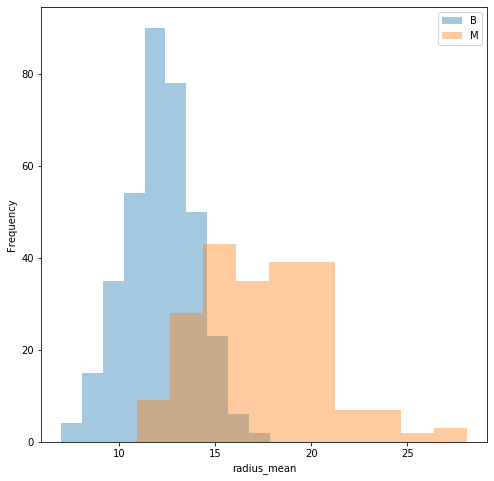

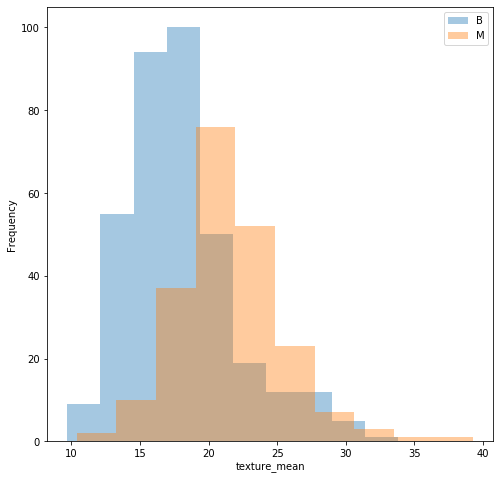

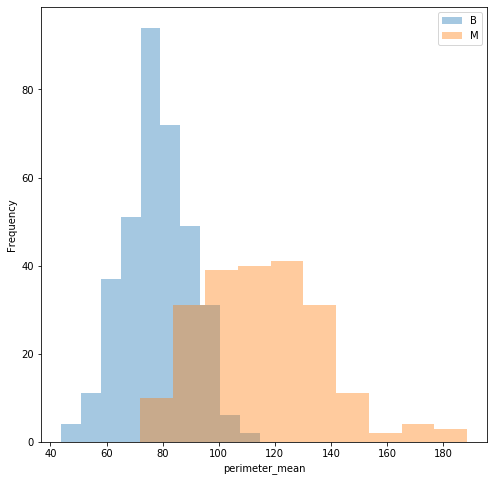

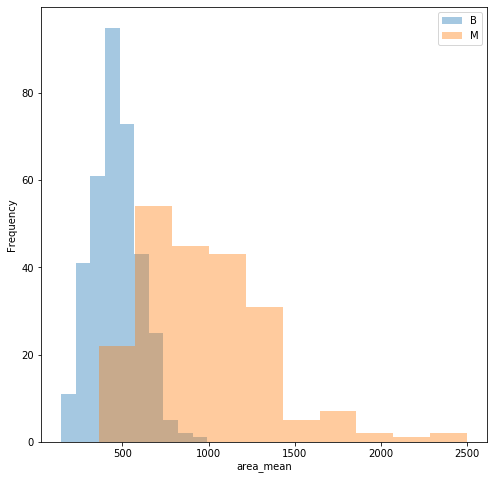

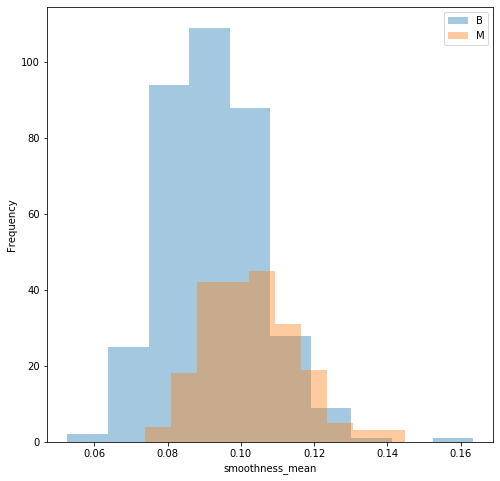

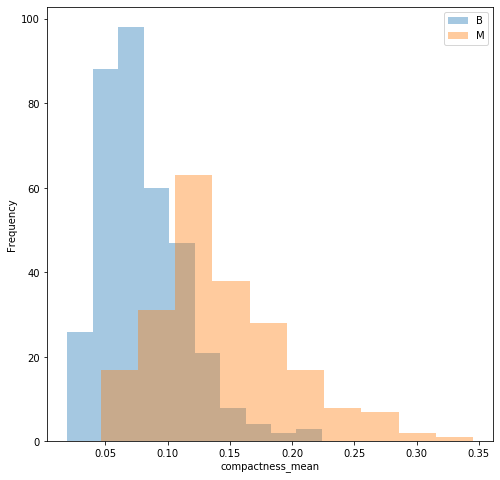

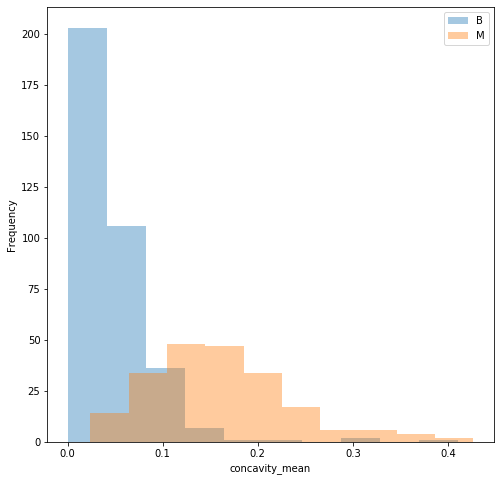

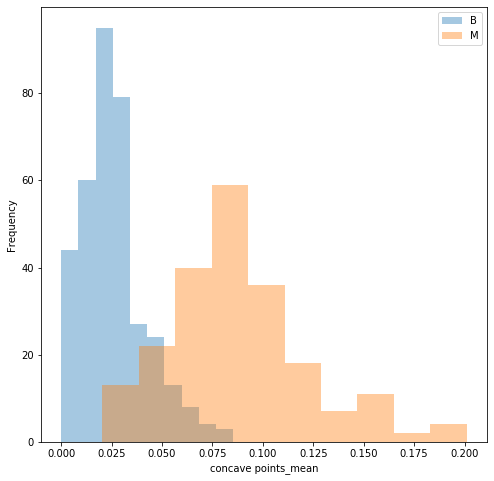

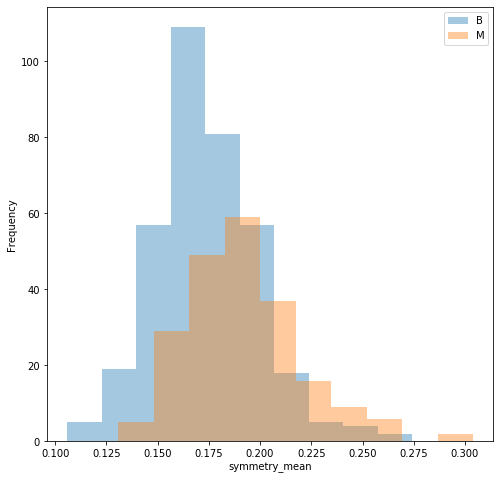

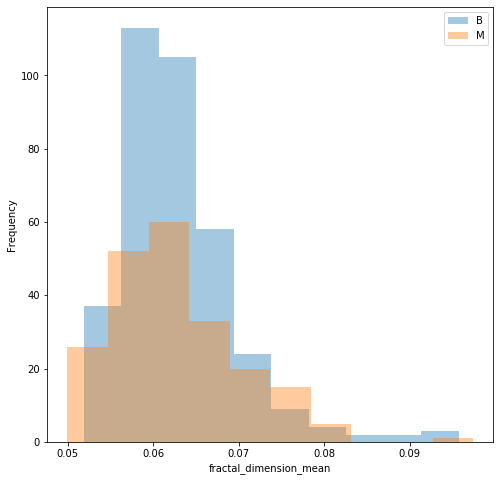

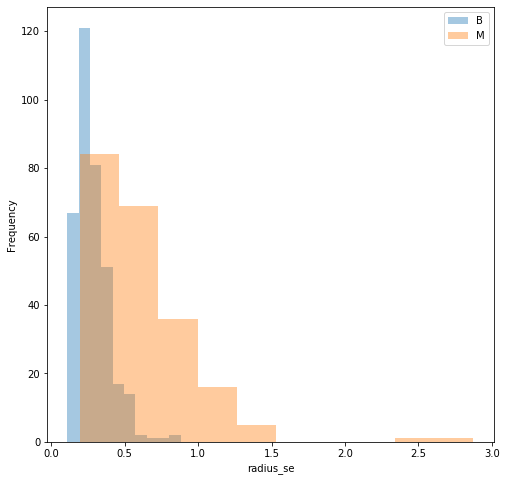

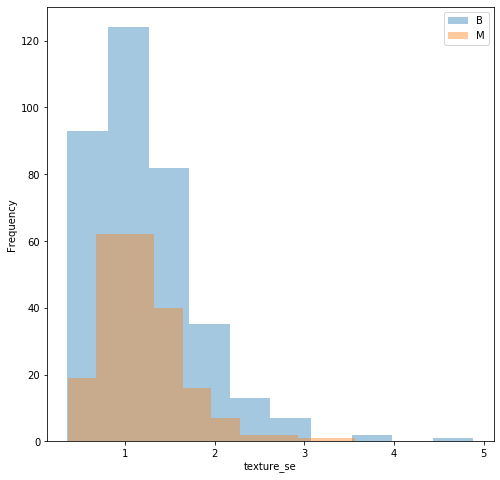

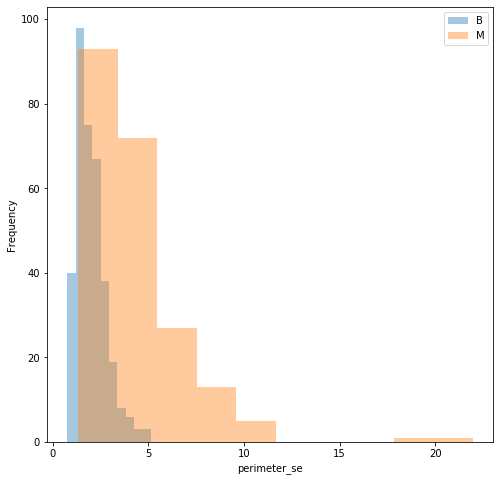

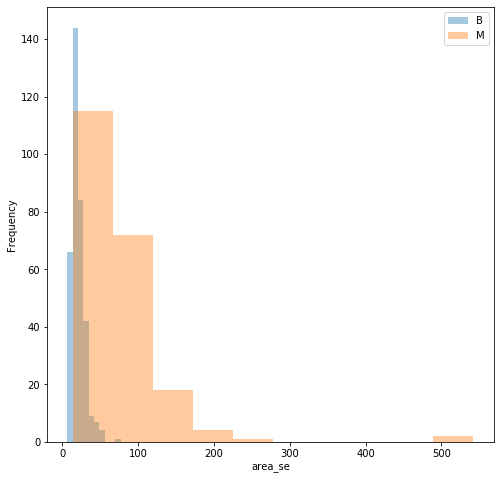

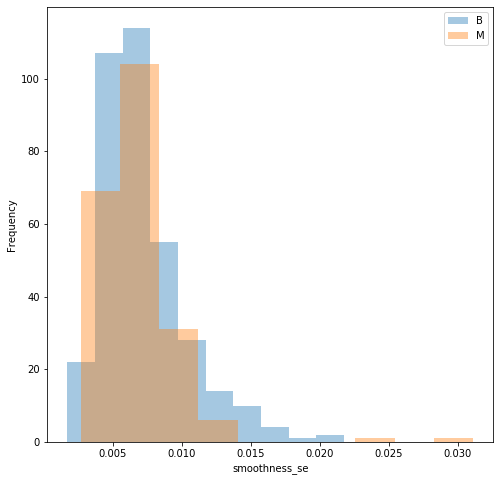

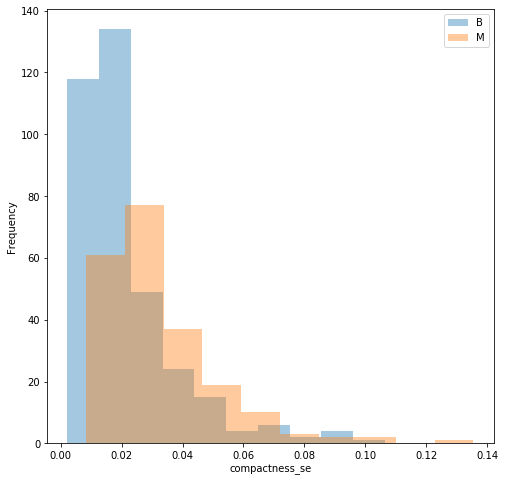

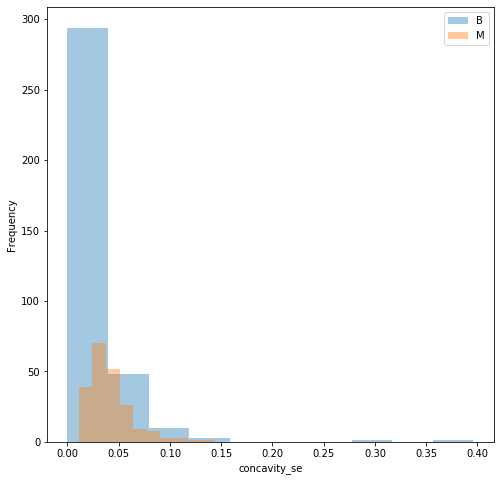

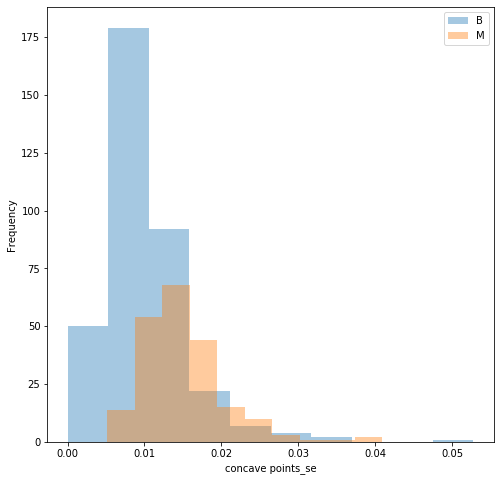

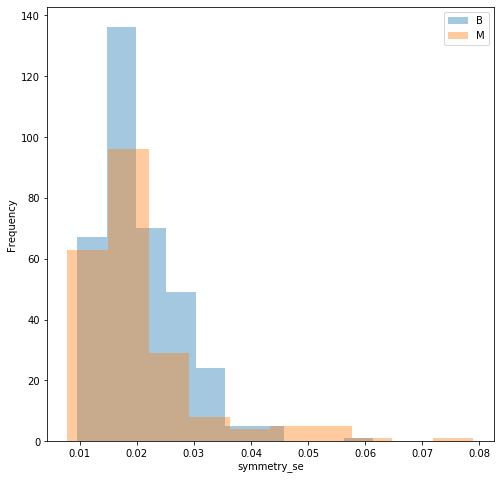

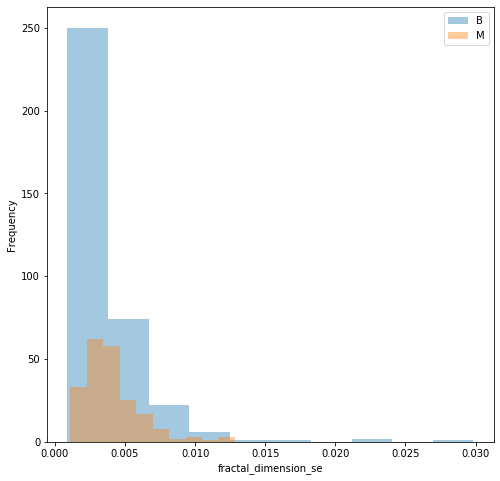

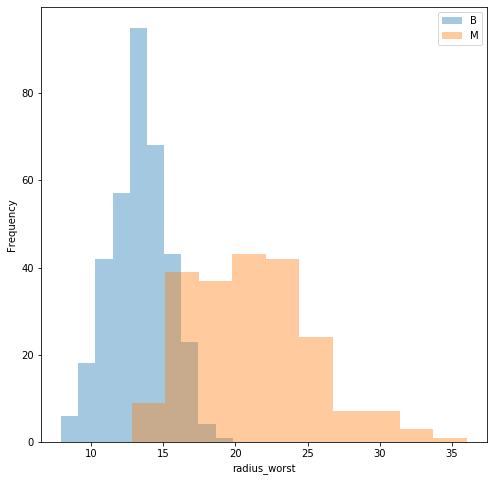

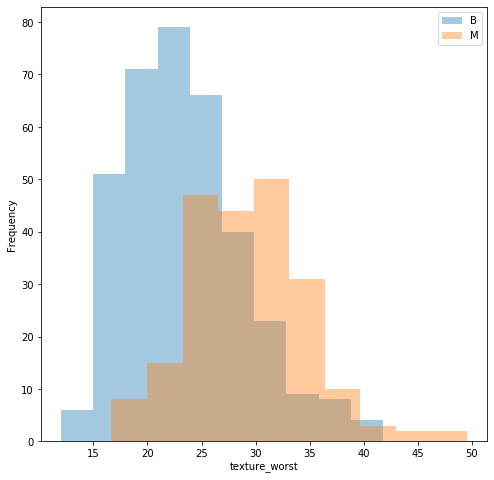

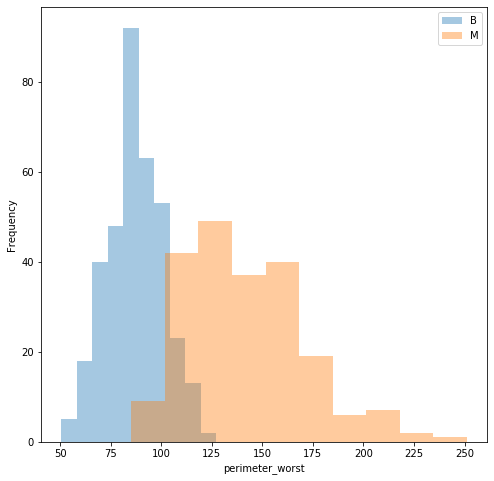

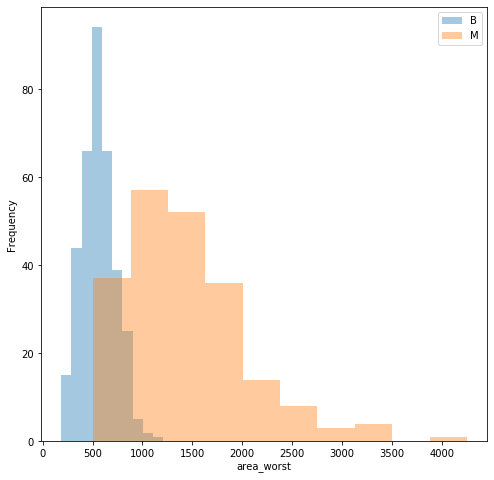

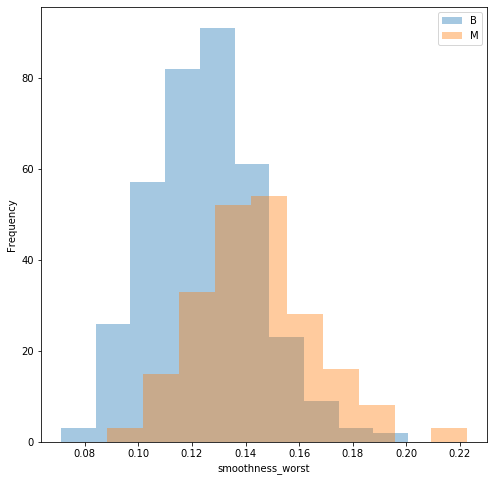

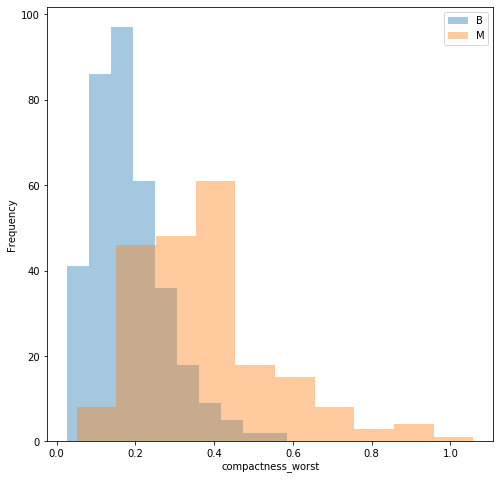

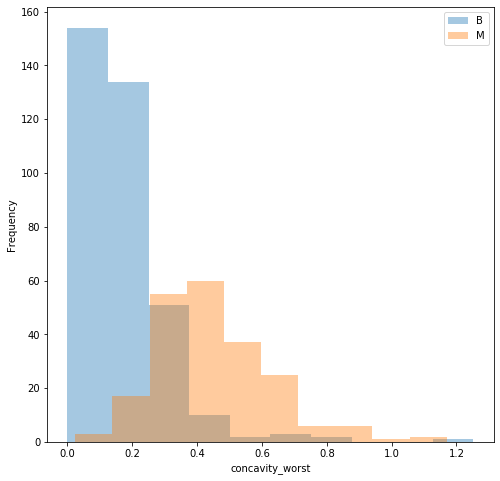

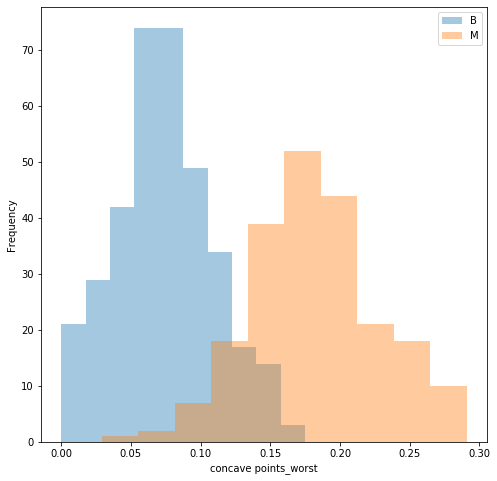

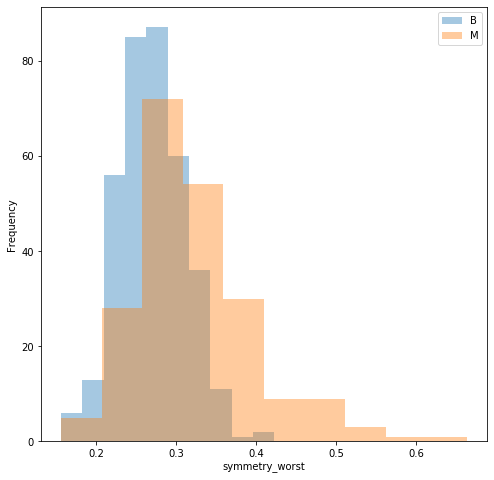

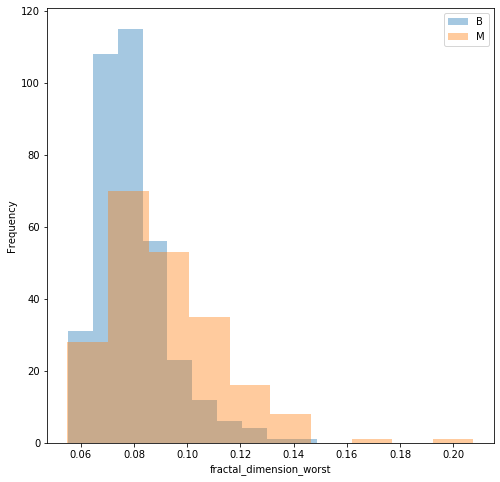

In [14]:
for col in data.select_dtypes('number').columns:
    group_area = data.groupby(['diagnosis'])[col]
    group_area.plot(kind='hist', figsize=[8,8], alpha = .4, legend=True)
    plt.xlabel(col)
    plt.show()

As we can see from histograms above there are some features which distributions vary significantly due to malignant and benign cases.<br><br>
I would **choose** *radius_mean*, *area_mean*, *perimeter_mean*, *concave points_mean*, *area_se*, *radius_worst*, *perimeter_worst*, *area_worst*, *concave points_worst* features to distinguish between malignant and benign cases because their histograms differ seriously for those cases.<br><br>
Due to plots above I would **exclude** *texture_mean*, *smoothness_mean*, *symmetry_mean*, *fractal_dimension_mean*, *radius_se*, *texture_se*, *perimeter_se*, *smoothnes_se*, *compactness_se*, *concavity_se*, *concave points_se*, *symmetry_se*, *fractal_dimension_se*, *texture_worst*, *smoothness_worst*, *symmetry_worst*, *fractal_dimension_worst*. The histograms of the features have significantly big intersections for malignant and benign cases.

<a id="Boxplots"></a>

### Boxplots

#### Boxplot (*radius_mean* relationship with *diagnosis*)

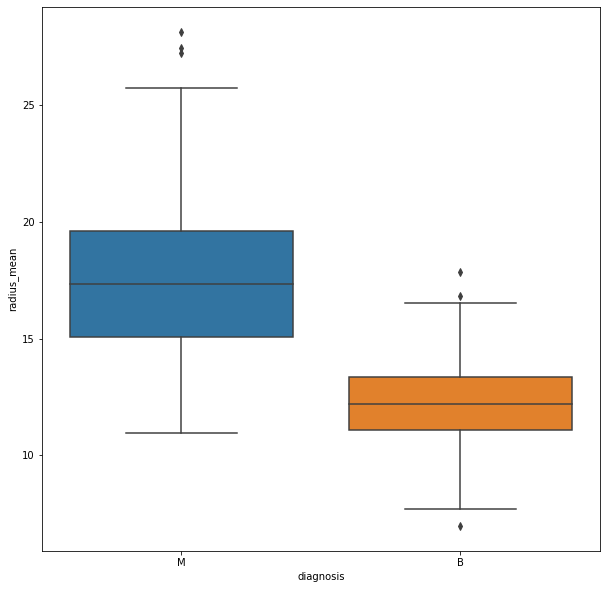

In [15]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x='diagnosis', y='radius_mean', data=data)    
plt.show()    

In [16]:
data[['diagnosis', 'radius_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='radius_mean', ascending=False)

diagnosis  radius_mean
1         M    17.462830
0         B    12.146524

The mean value of *radius_mean* for malignant cases is 17.462830, for benign cases is 12.146524 (benign tumors are smaller).
As we see from the plot maximum *radius_mean* value for malign cases is much higher than the one for benign cases.

#### Boxplot (*texture_mean* relationship with *diagnosis*)

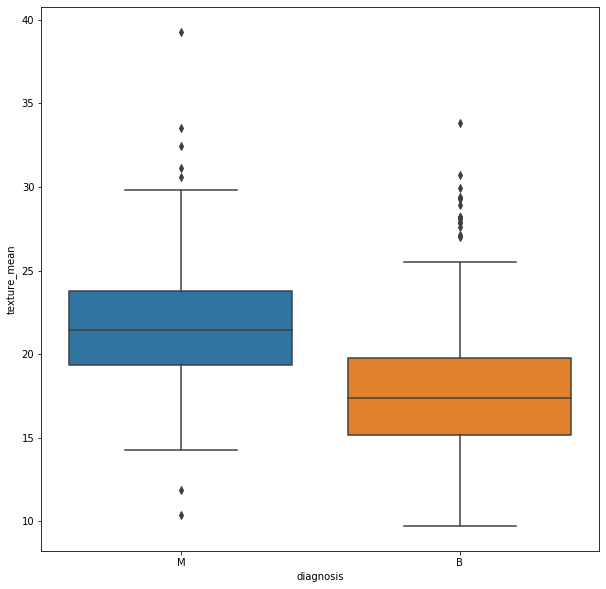

In [17]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="texture_mean", data=data)
plt.show()

In [18]:
data[['diagnosis', 'texture_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='texture_mean', ascending=False)

diagnosis  texture_mean
1         M     21.604906
0         B     17.914762

The mean value of *radius_mean* for malignant cases is 21.604906, for benign cases is 17.914762. Nevertheless on the plot we can see that variation of the *texture_mean* for malignant cases looks the same as for benign cases. We've already seen that in [Histograms](#Histograms) section.

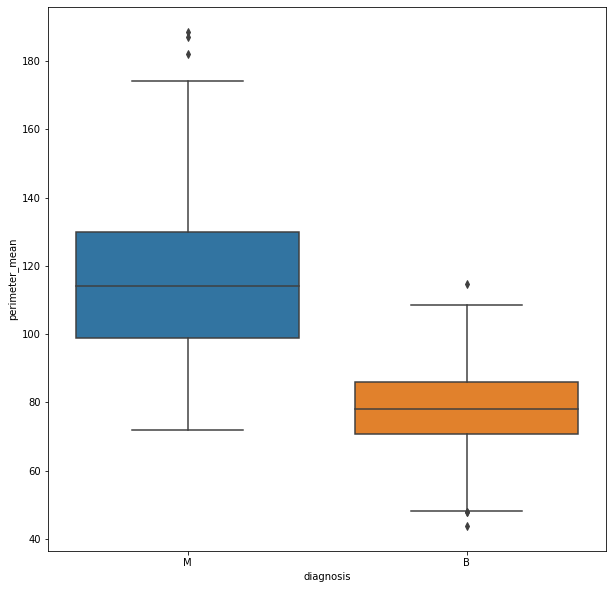

In [19]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="perimeter_mean", data=data)
plt.show()

In [20]:
data[['diagnosis', 'perimeter_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='perimeter_mean', ascending=False)

diagnosis  perimeter_mean
1         M      115.365377
0         B       78.075406

On the plot we can see that *perimeter_mean* is much more representative for defining diagnosis than *texture_mean*. The mean value of *perimeter_mean* for malignant is 115.365377, for benign is 78.075406.<br>
Max value of *perimeter_mean* for malignant is much bigger than for benign. Min value of *perimeter_mean* for benign is smaller than for malignant. This is rather good feature for our task.

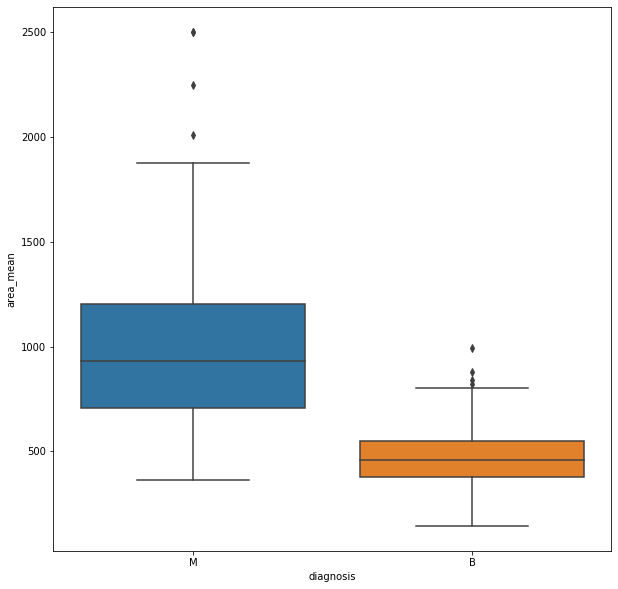

In [21]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="area_mean", data=data)
plt.show()

In [22]:
data[['diagnosis', 'area_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='area_mean', ascending=False)

diagnosis   area_mean
1         M  978.376415
0         B  462.790196

One more good feature according to difference between mean values and according to values of quartiles for malignant and benign tumors!

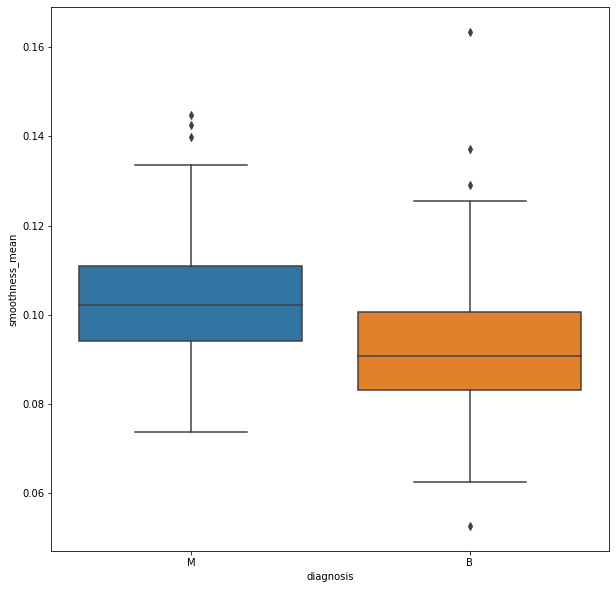

In [23]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="smoothness_mean", data=data)
plt.show()

From the above we can see that *smoothness_mean* is not good at categorizing malignant and benign cases. Already saw that in [Histograms](#Histograms).

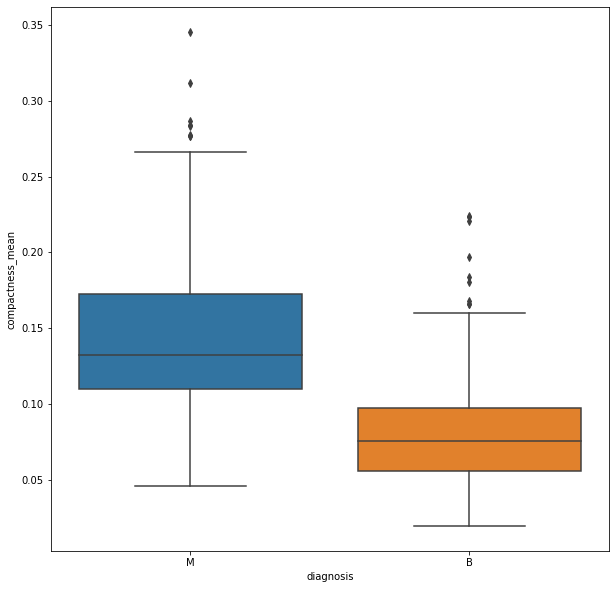

In [24]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="compactness_mean", data=data)
plt.show()

*Compactness_mean* is rather good for splitting malignant and benign tumors. May be because *сompactness_mean* is mean of `perimeter^2 / area - 1.0`, and perimeter and area are valuable features for our task.

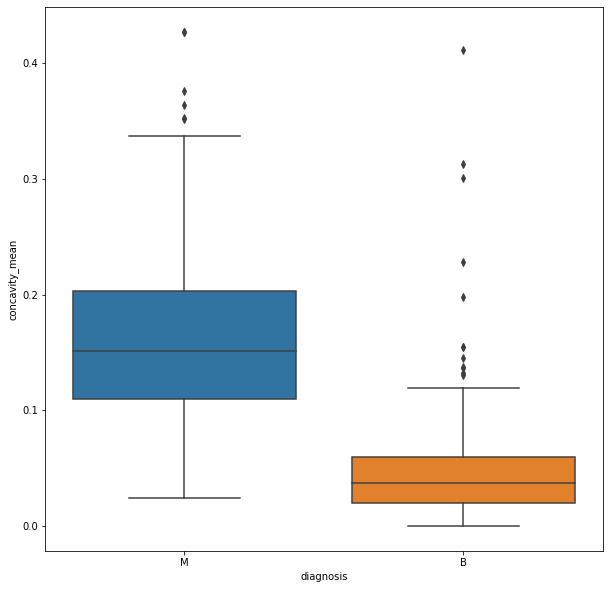

In [25]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="concavity_mean", data=data)
plt.show()

In [26]:
data[['diagnosis', 'concavity_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='concavity_mean', ascending=False)

diagnosis  concavity_mean
1         M        0.160775
0         B        0.046058

*Concativity_mean* is rather good for tumors categorization. Mean value of *concavity_mean* for malignant cases is 0.160775, for benign is 0.046058. There are many outliers in the benign cases group. 

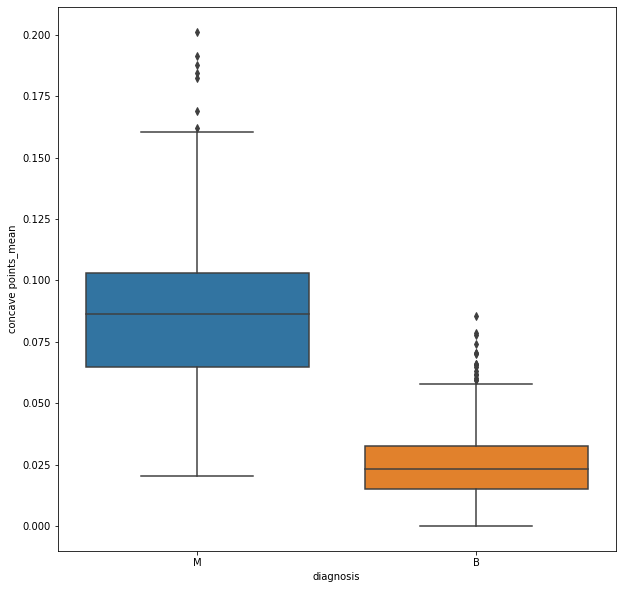

In [27]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="concave points_mean", data=data)
plt.show()

In [28]:
data[['diagnosis', 'concave points_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='concave points_mean', ascending=False)

diagnosis  concave points_mean
1         M             0.087990
0         B             0.025717

Bivariate analysis with the boxplot shows that median for *concave points_mean* is greater for malignant cases. It is a notable feature for defining diagnosis. <br>Mean value of *concave points_mean* for malignant tumors is 0.087990, for benign is 0.025717. 

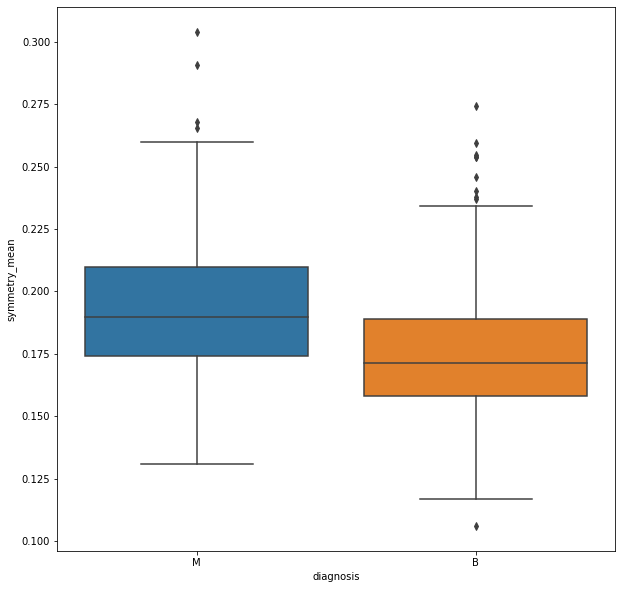

In [29]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="symmetry_mean", data=data)
plt.show()

*Symmetry_mean* values are rather alike both for malignant and benign cases.<br>
**That plot and other ones below confirm that corresponding features are useless for making a diagnosis.** We've already seen that in [Histograms](#Histograms) section.


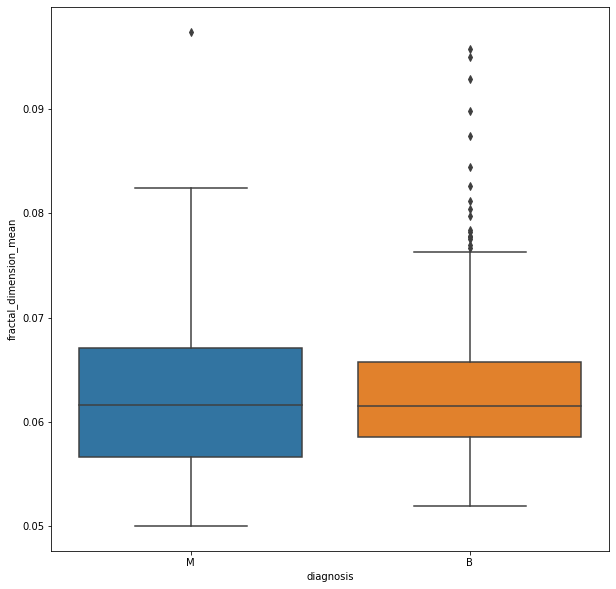

In [30]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="fractal_dimension_mean", data=data)
plt.show()

*fractal_dimension_mean* values are rather alike both for malignant and benign cases. More outliers present in benign cases.

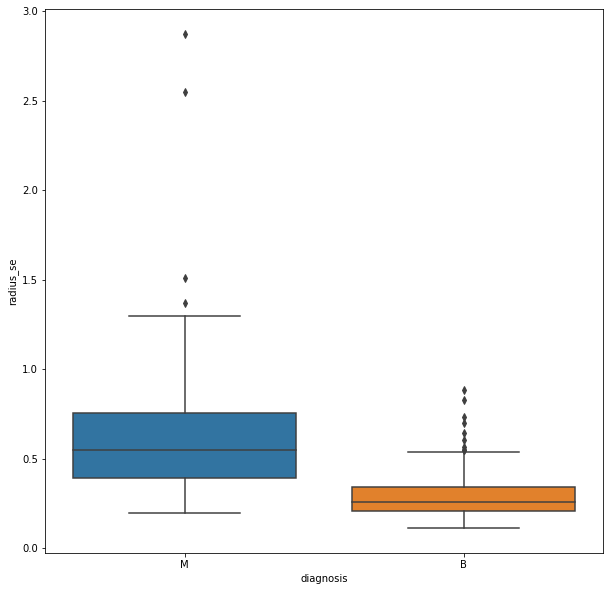

In [31]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="radius_se", data=data)
plt.show()

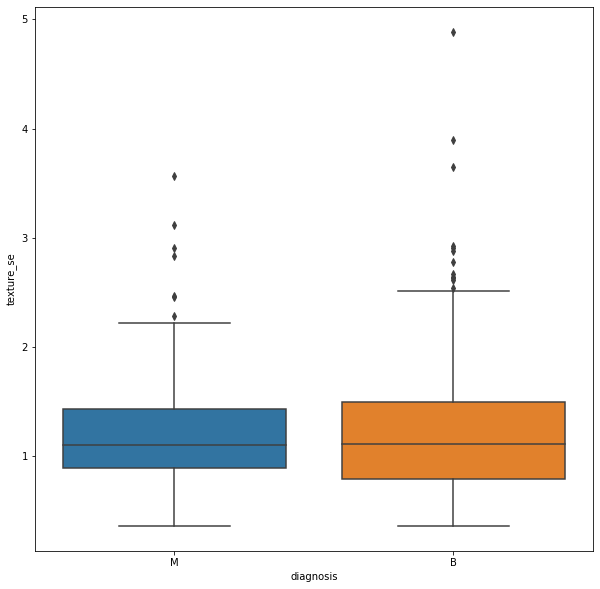

In [32]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="texture_se", data=data)
plt.show()

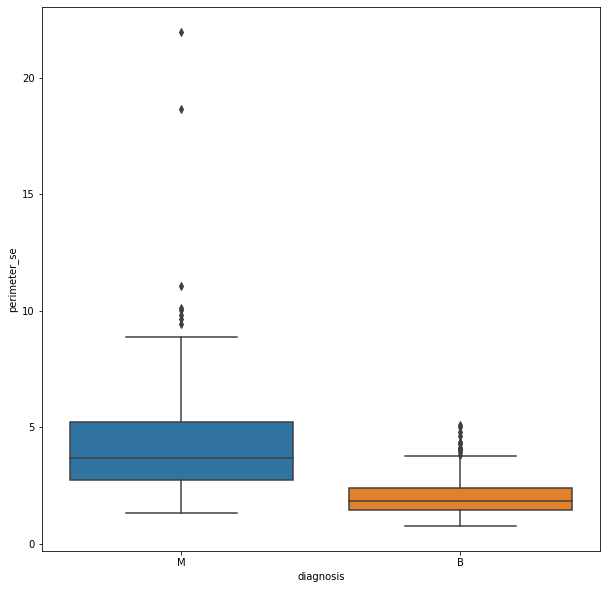

In [33]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="perimeter_se", data=data)
plt.show()

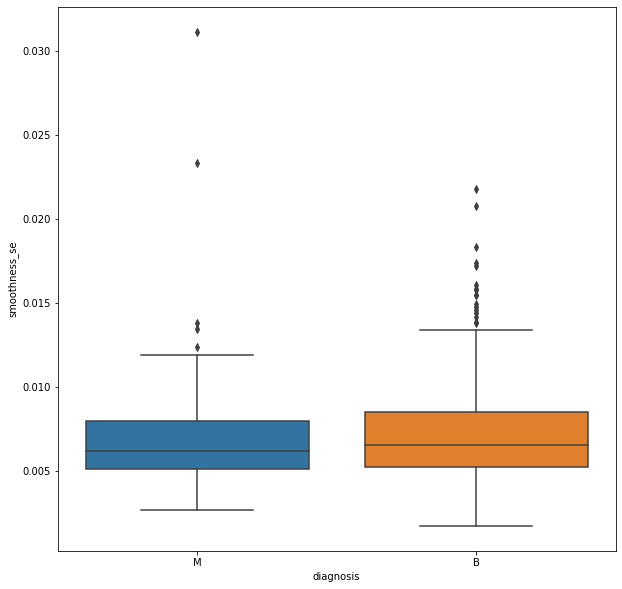

In [34]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="smoothness_se", data=data)
plt.show()

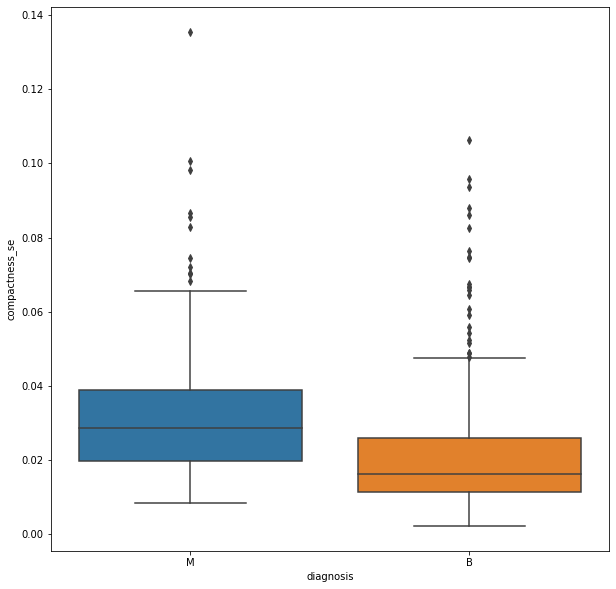

In [35]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="compactness_se", data=data)
plt.show()

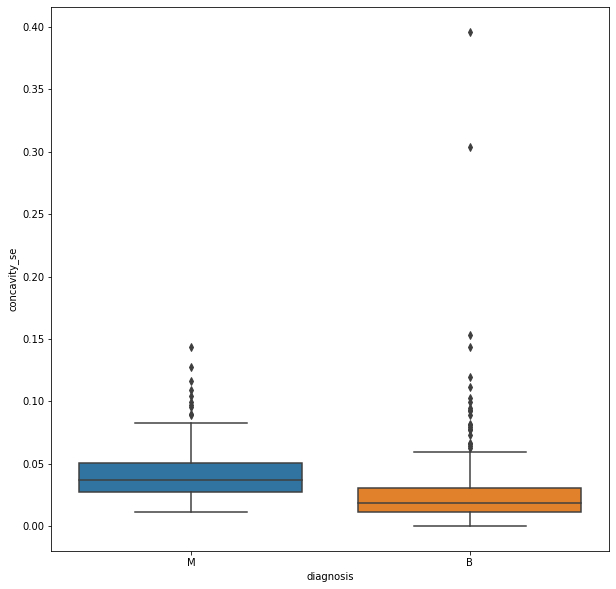

In [36]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="concavity_se", data=data)
plt.show()

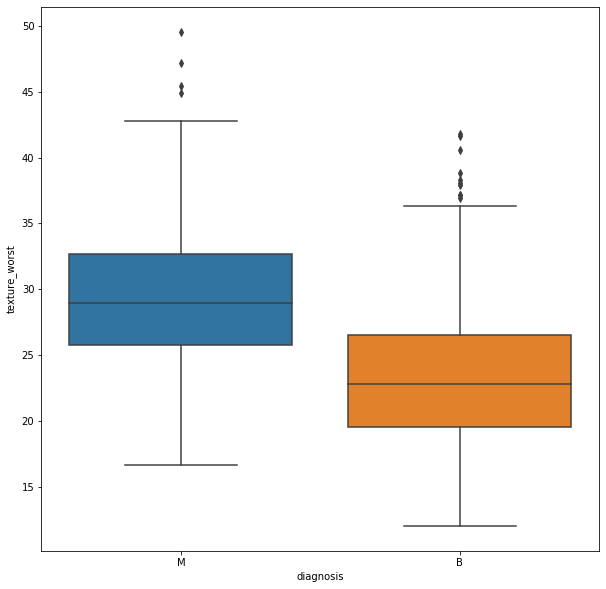

In [37]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="texture_worst", data=data)
plt.show()

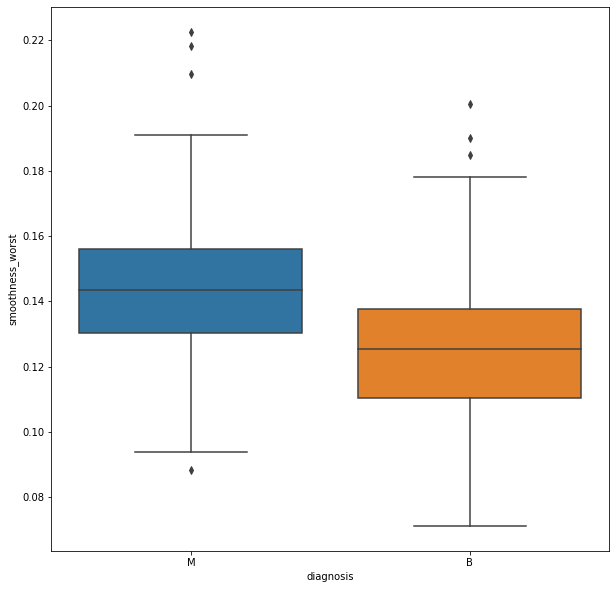

In [38]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="smoothness_worst", data=data)
plt.show()

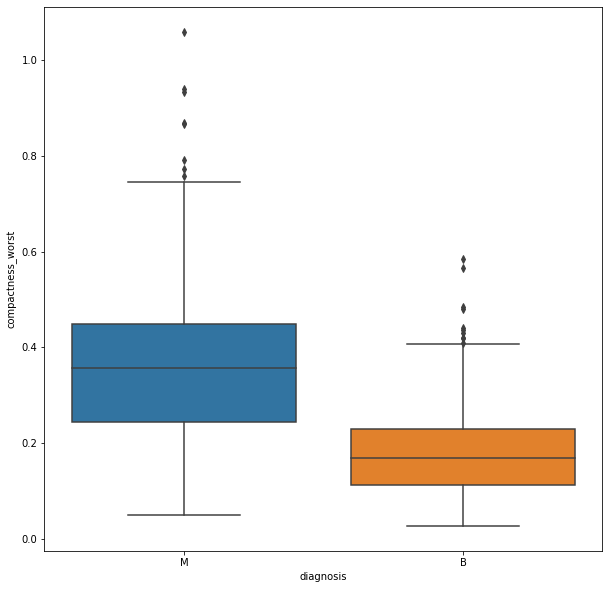

In [39]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="compactness_worst", data=data)
plt.show()

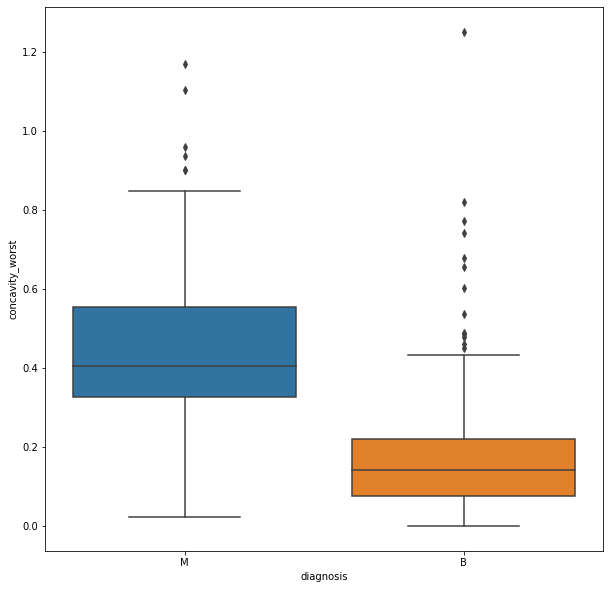

In [40]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="concavity_worst", data=data)
plt.show()

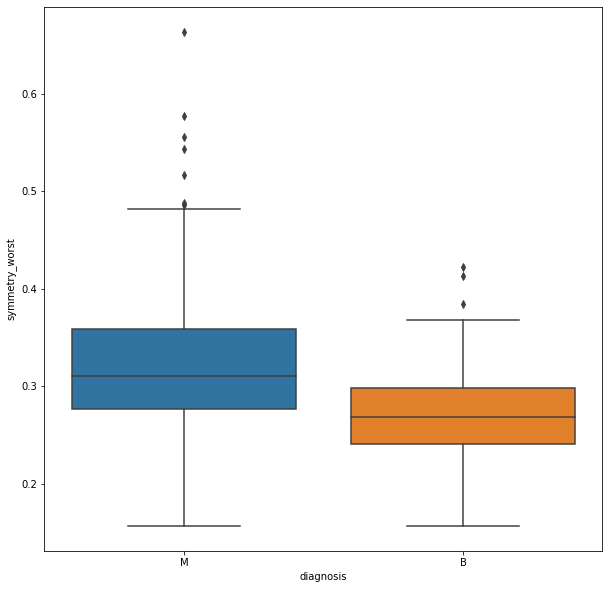

In [41]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="symmetry_worst", data=data)
plt.show()

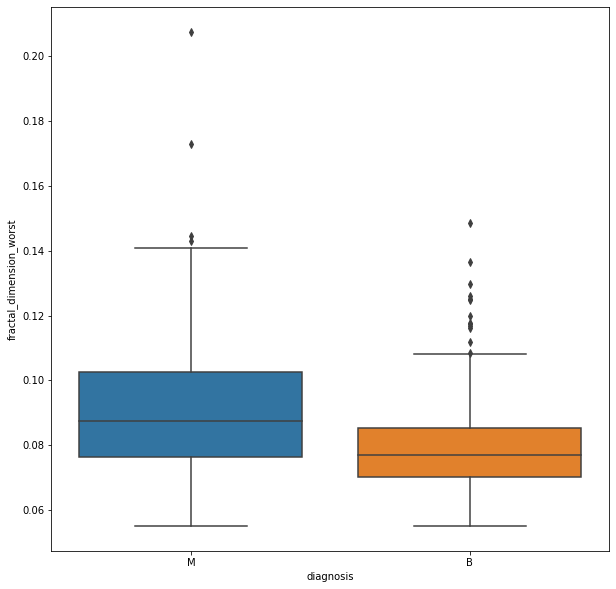

In [42]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="fractal_dimension_worst", data=data)
plt.show()

**The plots below show us rather serious relationship between features and our target variable *diagnosis*.**

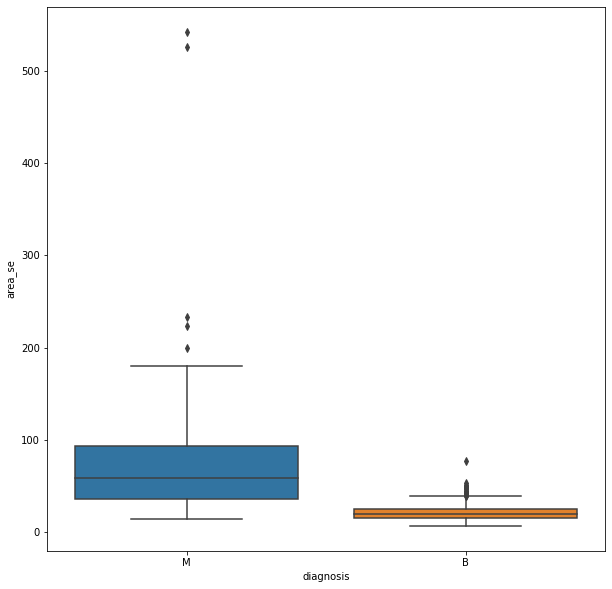

In [43]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="area_se", data=data)
plt.show()

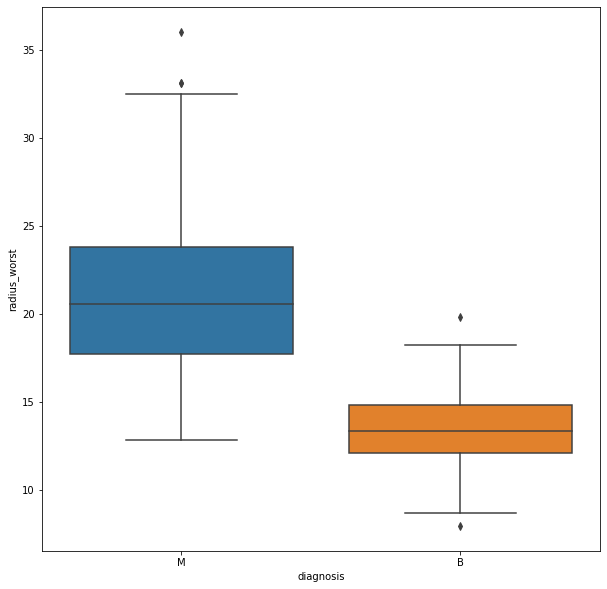

In [44]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="radius_worst", data=data)
plt.show()

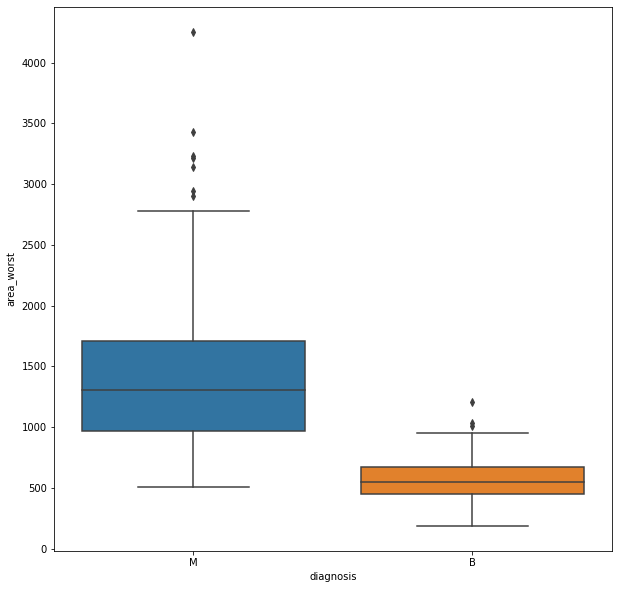

In [45]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="area_worst", data=data)
plt.show()

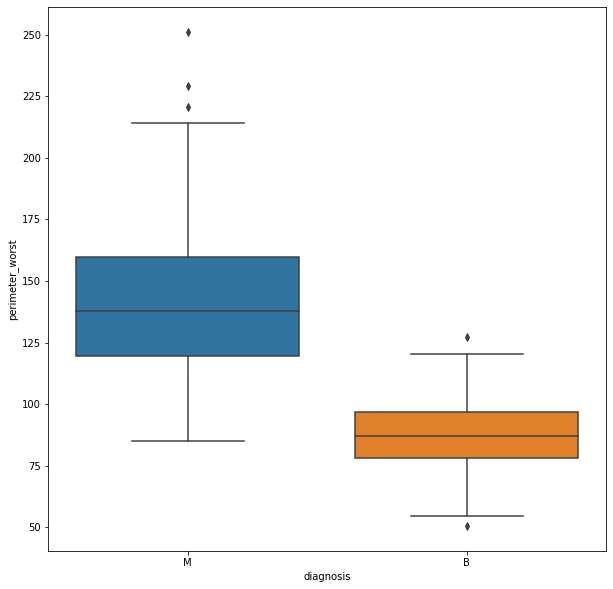

In [46]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="perimeter_worst", data=data)
plt.show()

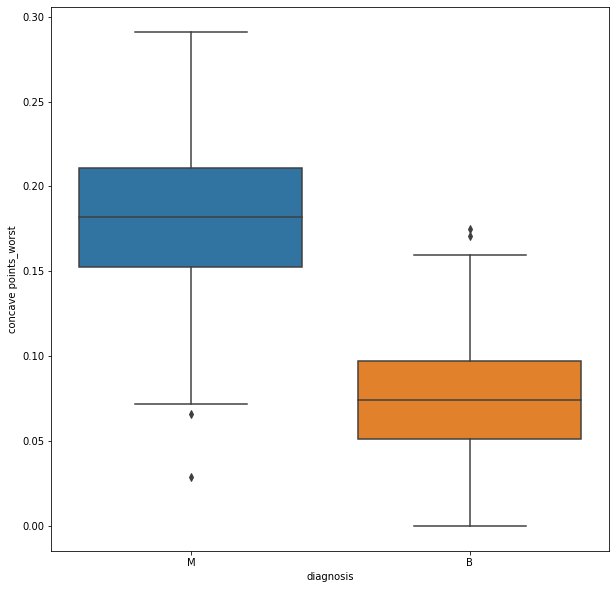

In [47]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="concave points_worst", data=data)
plt.show()

The summary of boxplot analysis confirmed the summary of [histograms](#Histograms) analysis.

<a id="Multivariative_Analysis"></a>

### Multivariate analysis
#### Correlation among the numeric variables

In [48]:
corr_matrix = data.corr()

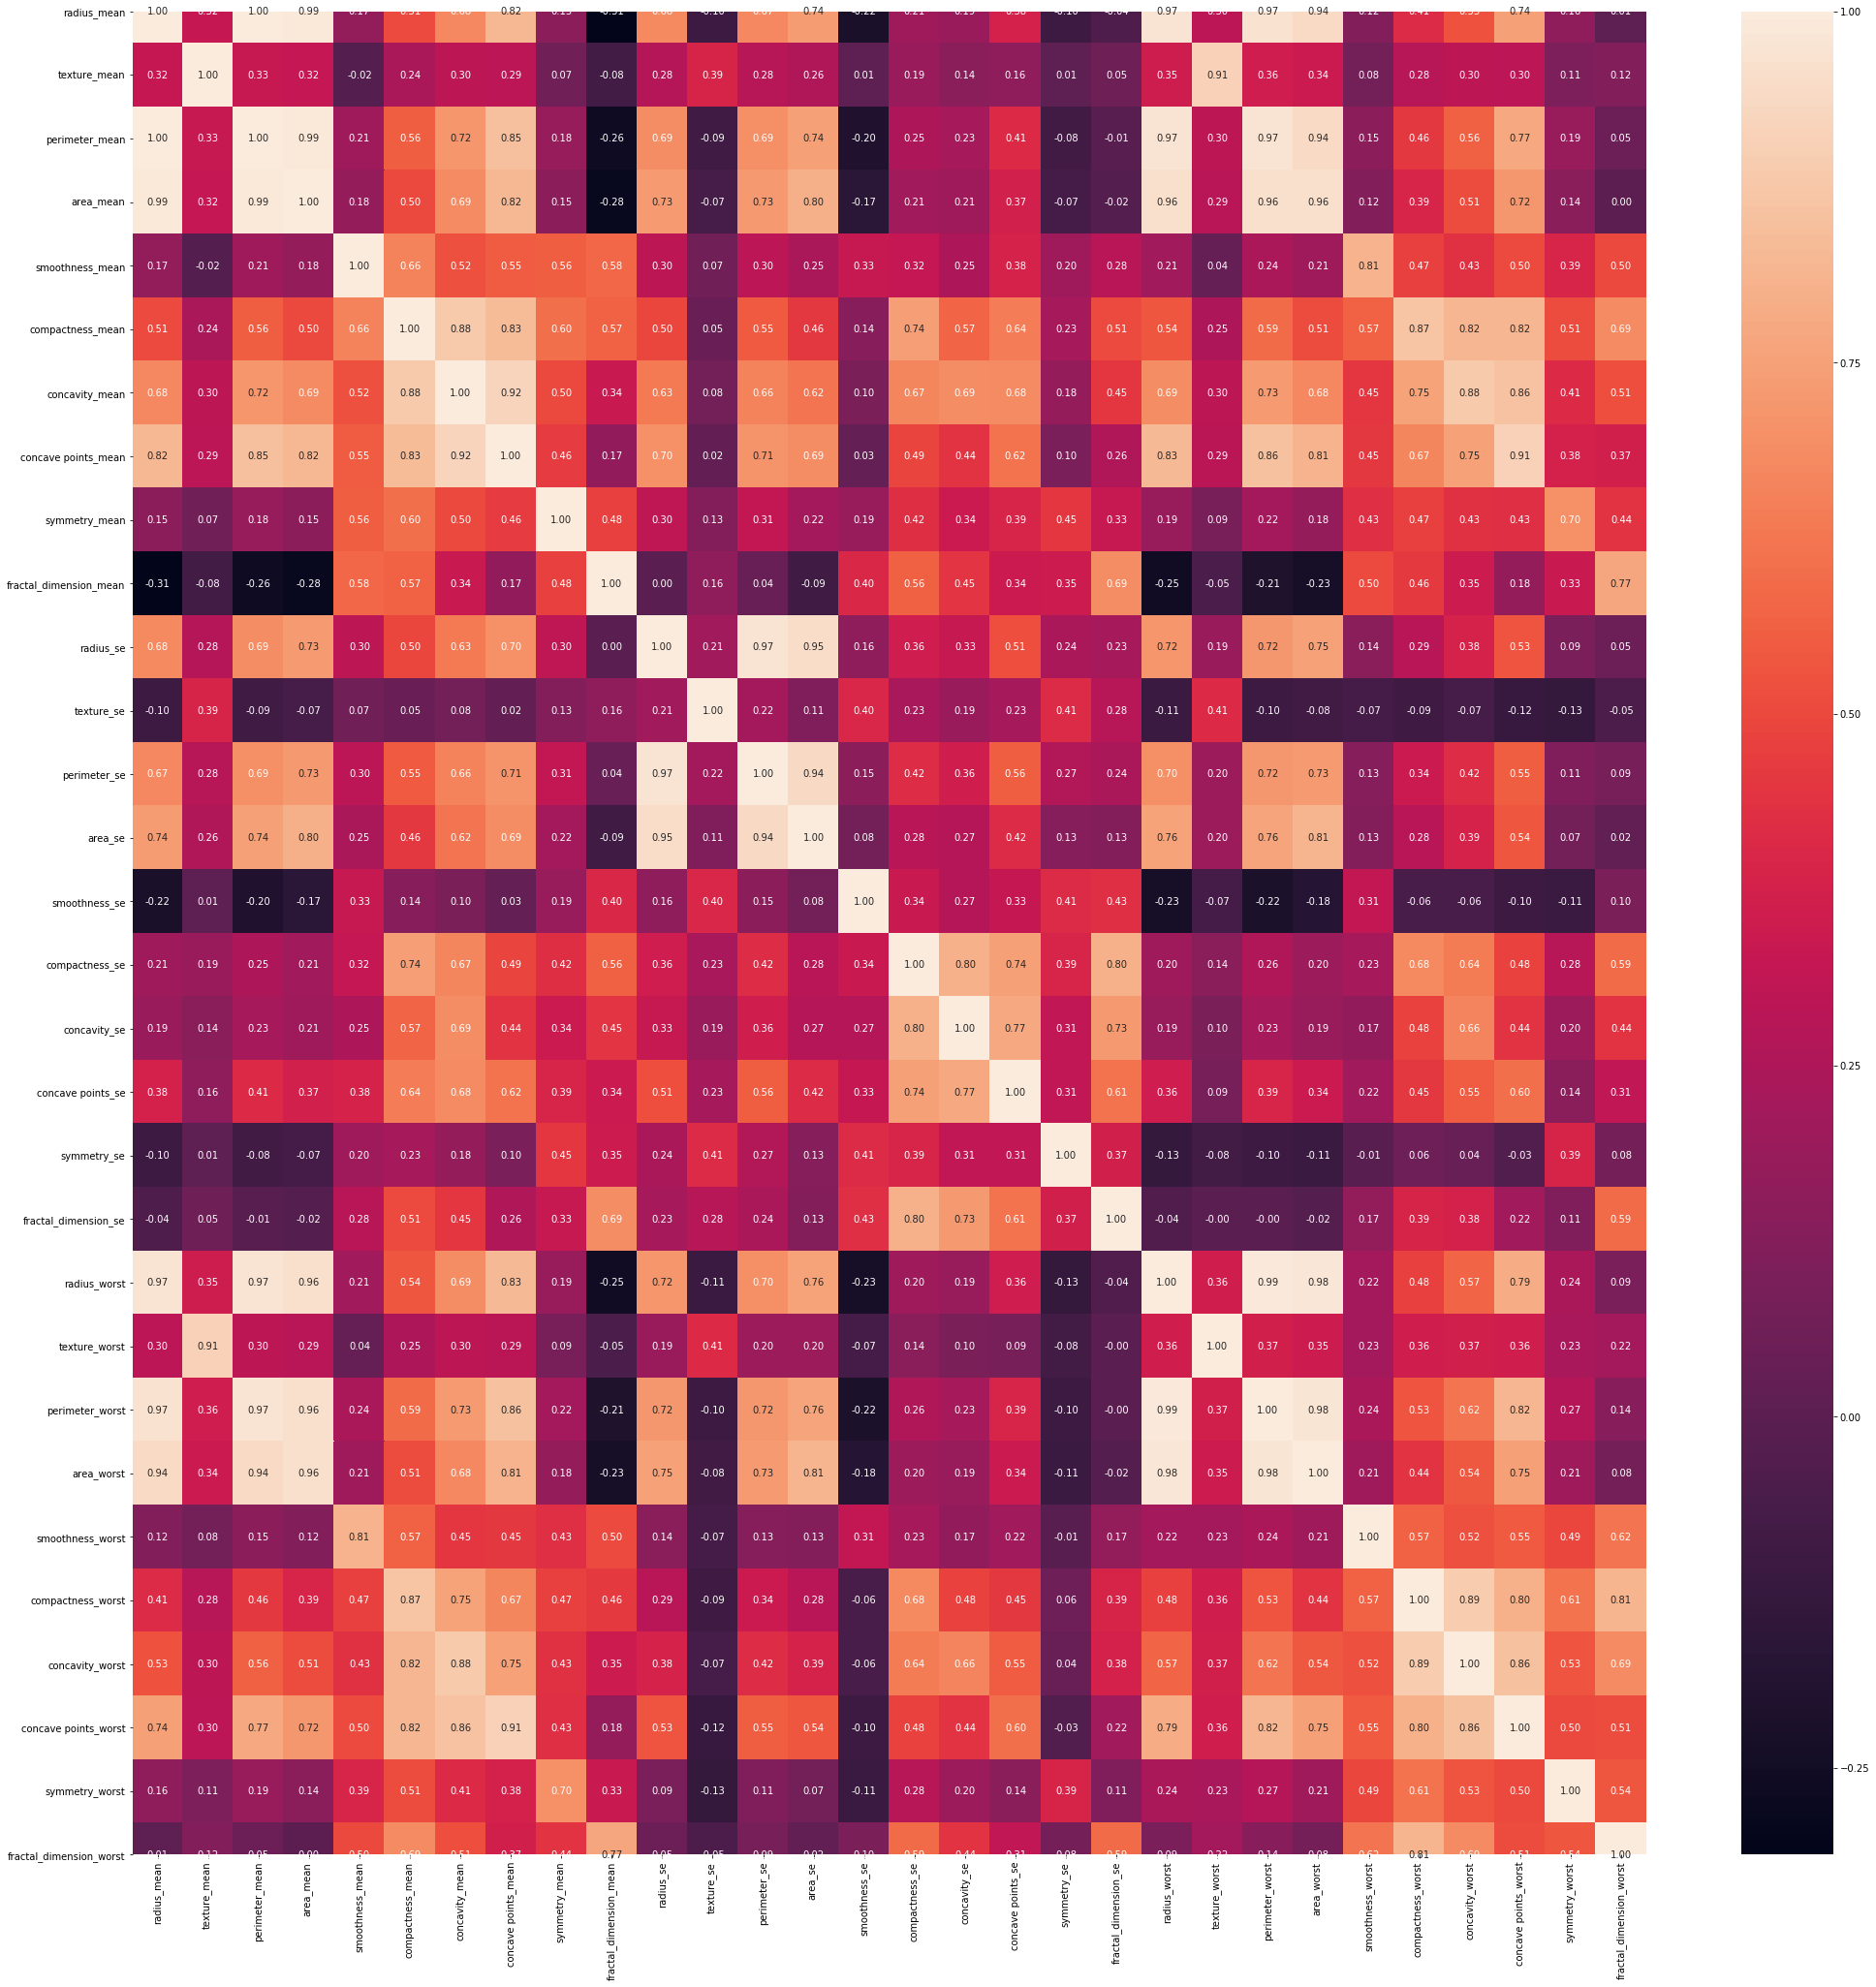

In [49]:
plt.figure(figsize=(35,35));
sns.heatmap(corr_matrix, annot=True, fmt='.2f');

In [50]:
# iterate over columns only in the lower triangular matrix of correlation matrix
most_correlated = []
j = 1
for i in np.arange(corr_matrix.shape[0]):
    for k in np.arange(j, corr_matrix.shape[1]):
        if corr_matrix.iat[k,i] > 0.6:
            # write to most_correlated array correlated features pairs
            most_correlated.append([corr_matrix.columns.values[k], corr_matrix.index.values[i]])
            #print(k, corr_matrix.columns.values[k], i,corr_matrix.index.values[i], corr_matrix.iat[k, i])
    j += 1

Let's create scatter plots for the most correlated features using seaborn `regplot` method. As it is based on regression by default it will introduce a regression line in the data.

Correlation coefficient between perimeter_mean and radius_mean is equal to 0.9978552814938113


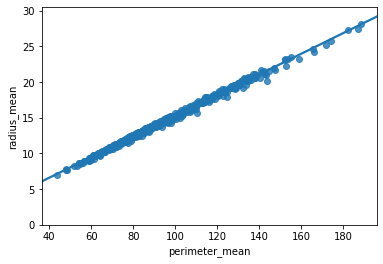

Correlation coefficient between area_mean and radius_mean is equal to 0.9873571700566119


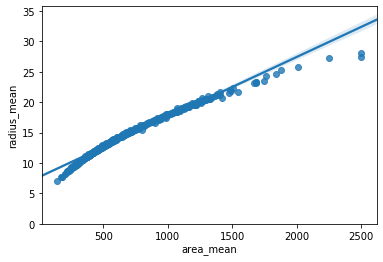

Correlation coefficient between concavity_mean and radius_mean is equal to 0.6767635503908116


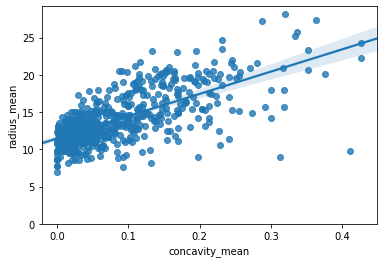

Correlation coefficient between concave points_mean and radius_mean is equal to 0.8225285223871791


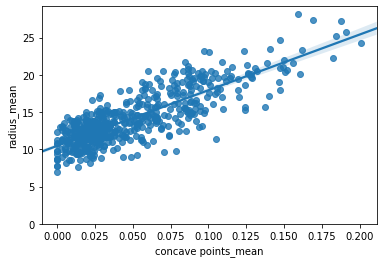

Correlation coefficient between radius_se and radius_mean is equal to 0.6790903880020752


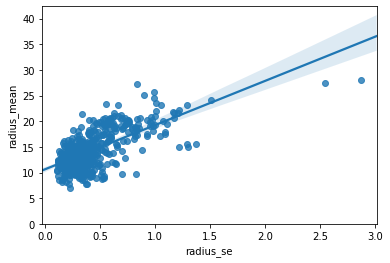

Correlation coefficient between perimeter_se and radius_mean is equal to 0.6741716157641062


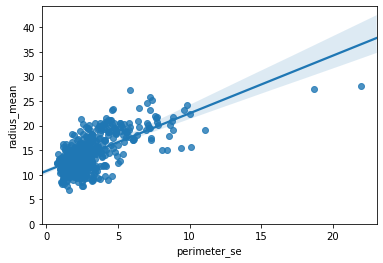

Correlation coefficient between area_se and radius_mean is equal to 0.7358636632128175


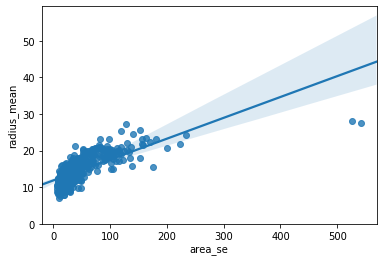

Correlation coefficient between radius_worst and radius_mean is equal to 0.9695389726112053


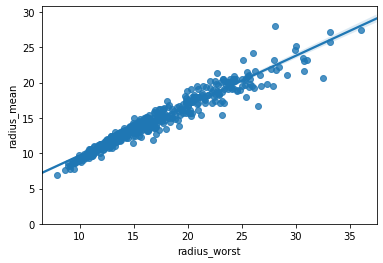

Correlation coefficient between perimeter_worst and radius_mean is equal to 0.9651365139559878


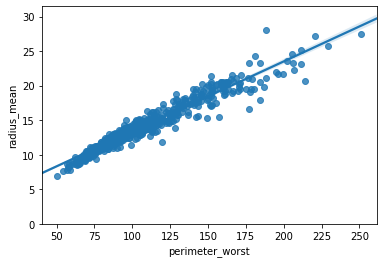

Correlation coefficient between area_worst and radius_mean is equal to 0.9410824595860459


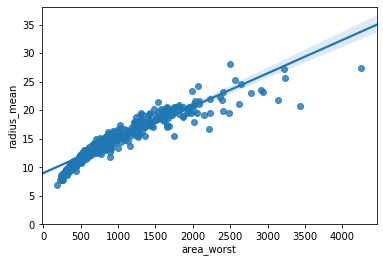

Correlation coefficient between concave points_worst and radius_mean is equal to 0.7442141978674656


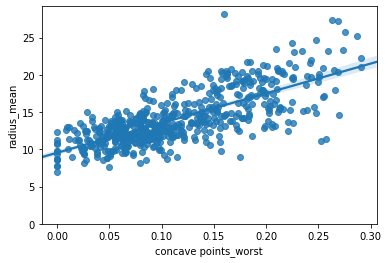

Correlation coefficient between texture_worst and texture_mean is equal to 0.9120445888404215


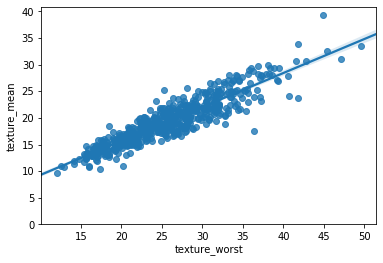

Correlation coefficient between area_mean and perimeter_mean is equal to 0.9865068039913906


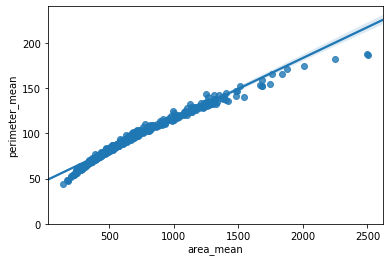

Correlation coefficient between concavity_mean and perimeter_mean is equal to 0.7161356501174044


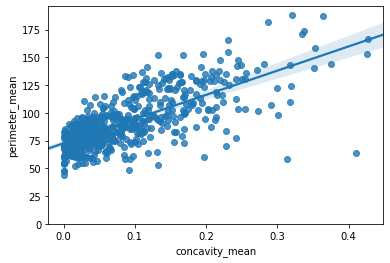

Correlation coefficient between concave points_mean and perimeter_mean is equal to 0.8509770412528199


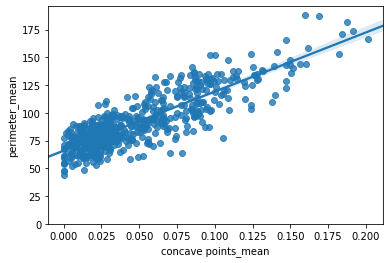

Correlation coefficient between radius_se and perimeter_mean is equal to 0.6917650135334821


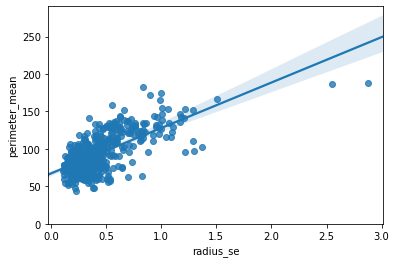

Correlation coefficient between perimeter_se and perimeter_mean is equal to 0.693134889540866


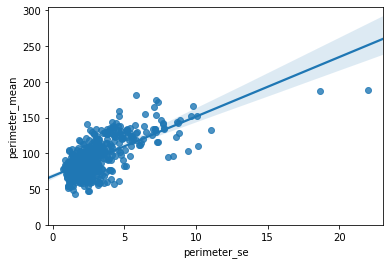

Correlation coefficient between area_se and perimeter_mean is equal to 0.7449826941190679


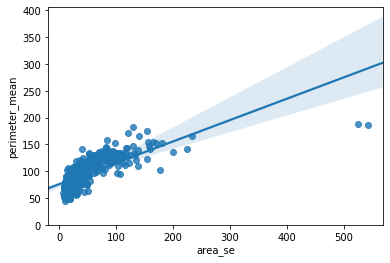

Correlation coefficient between radius_worst and perimeter_mean is equal to 0.9694763634663142


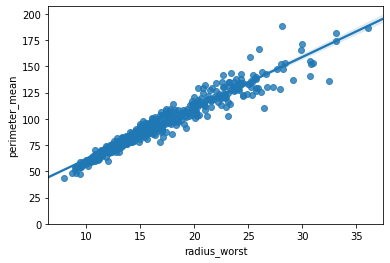

Correlation coefficient between perimeter_worst and perimeter_mean is equal to 0.9703868870426388


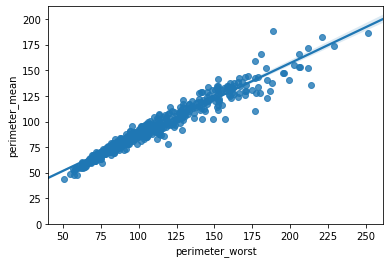

Correlation coefficient between area_worst and perimeter_mean is equal to 0.9415498080023057


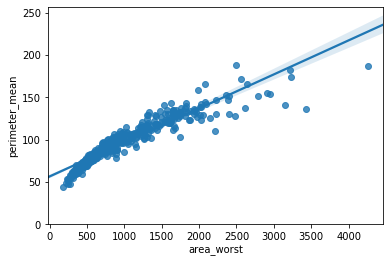

Correlation coefficient between concave points_worst and perimeter_mean is equal to 0.7712407893605479


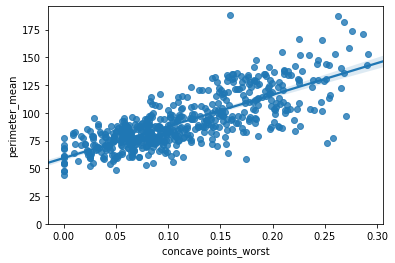

Correlation coefficient between concavity_mean and area_mean is equal to 0.6859828285519113


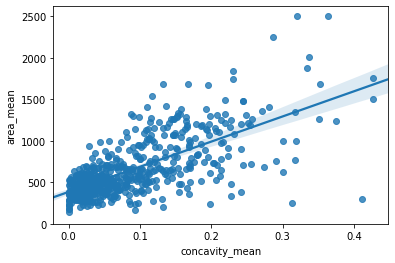

Correlation coefficient between concave points_mean and area_mean is equal to 0.823268868652435


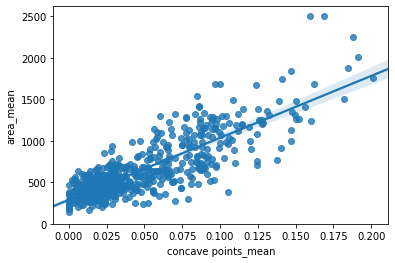

Correlation coefficient between radius_se and area_mean is equal to 0.7325622269972976


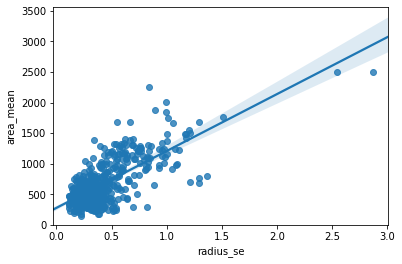

Correlation coefficient between perimeter_se and area_mean is equal to 0.7266283277906854


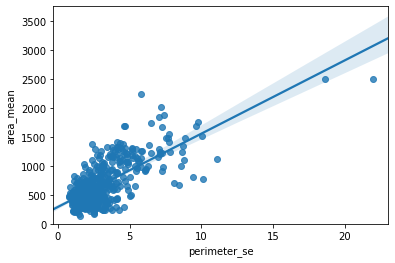

Correlation coefficient between area_se and area_mean is equal to 0.8000859212343217


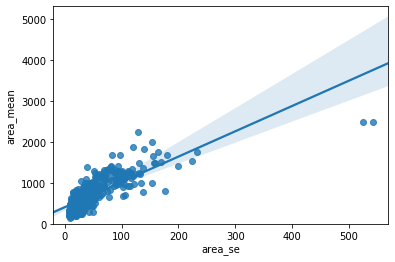

Correlation coefficient between radius_worst and area_mean is equal to 0.9627460860470841


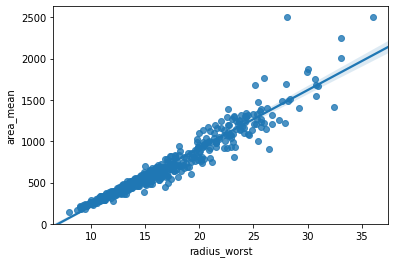

Correlation coefficient between perimeter_worst and area_mean is equal to 0.959119574355266


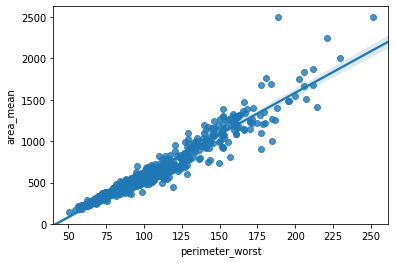

Correlation coefficient between area_worst and area_mean is equal to 0.9592133256499006


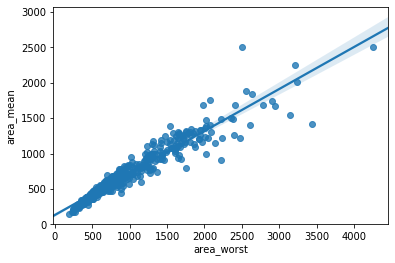

Correlation coefficient between concave points_worst and area_mean is equal to 0.722016626260358


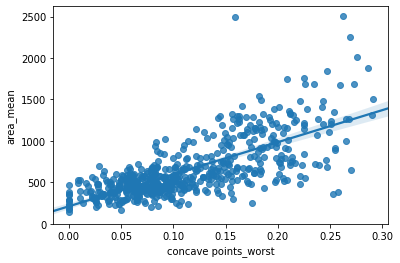

Correlation coefficient between compactness_mean and smoothness_mean is equal to 0.6591232152159219


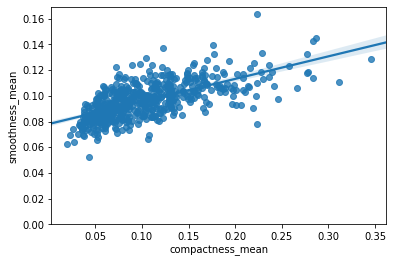

Correlation coefficient between smoothness_worst and smoothness_mean is equal to 0.8053241954943631


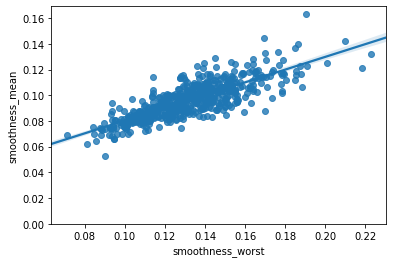

Correlation coefficient between concavity_mean and compactness_mean is equal to 0.8831206701772499


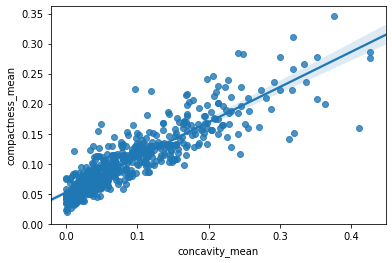

Correlation coefficient between concave points_mean and compactness_mean is equal to 0.8311350431336992


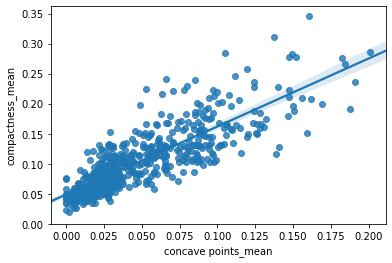

Correlation coefficient between symmetry_mean and compactness_mean is equal to 0.602641048405516


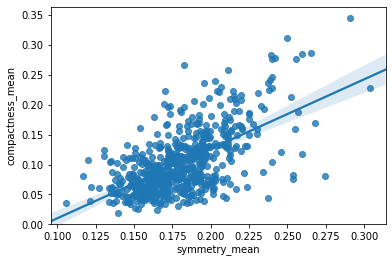

Correlation coefficient between compactness_se and compactness_mean is equal to 0.7387217896603926


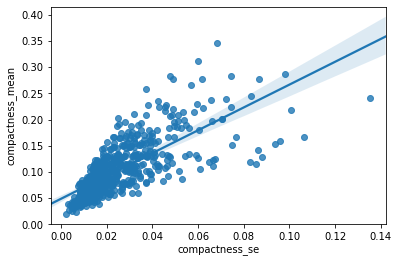

Correlation coefficient between concave points_se and compactness_mean is equal to 0.6422618509716465


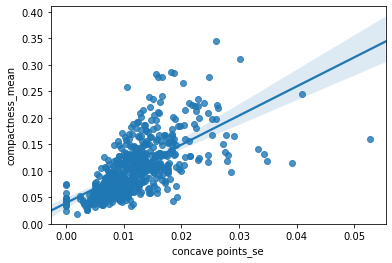

Correlation coefficient between compactness_worst and compactness_mean is equal to 0.8658090398022638


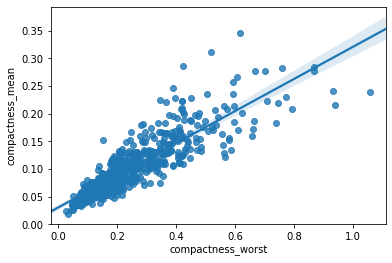

Correlation coefficient between concavity_worst and compactness_mean is equal to 0.8162752498000281


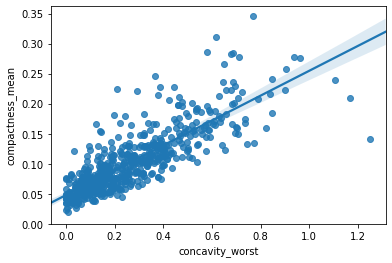

Correlation coefficient between concave points_worst and compactness_mean is equal to 0.8155732235690654


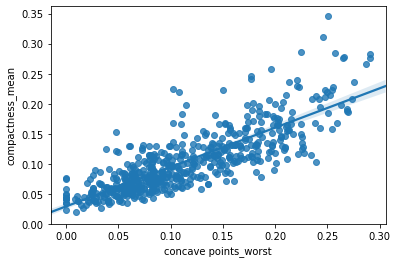

Correlation coefficient between fractal_dimension_worst and compactness_mean is equal to 0.6873823227538962


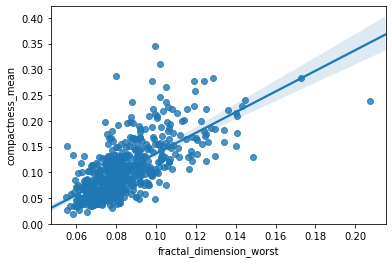

Correlation coefficient between concave points_mean and concavity_mean is equal to 0.9213910263788594


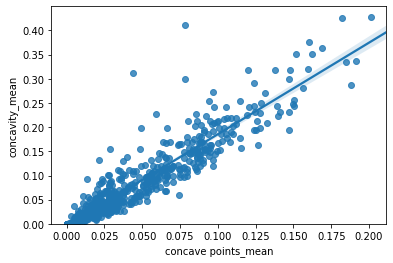

Correlation coefficient between radius_se and concavity_mean is equal to 0.6319248221414899


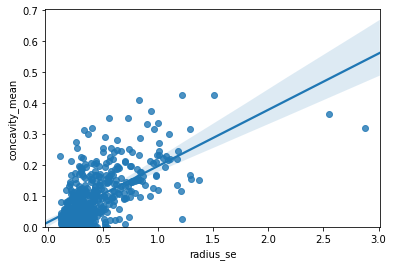

Correlation coefficient between perimeter_se and concavity_mean is equal to 0.6603907872419623


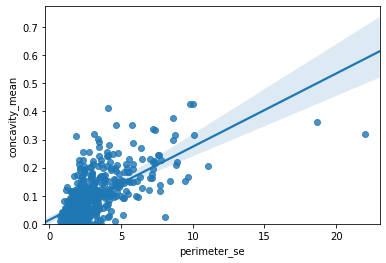

Correlation coefficient between area_se and concavity_mean is equal to 0.6174268058452416


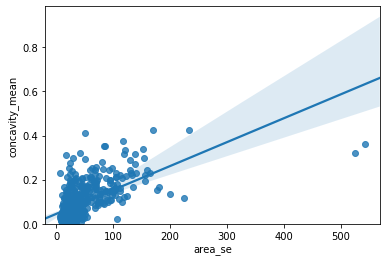

Correlation coefficient between compactness_se and concavity_mean is equal to 0.6702788246430197


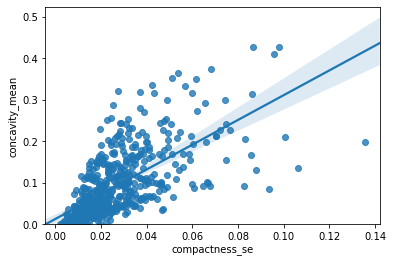

Correlation coefficient between concavity_se and concavity_mean is equal to 0.6912702075448516


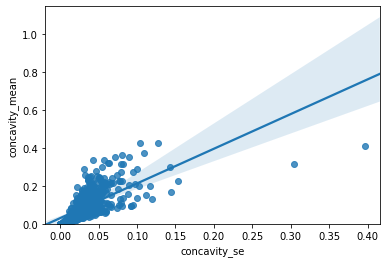

Correlation coefficient between concave points_se and concavity_mean is equal to 0.6832599165123265


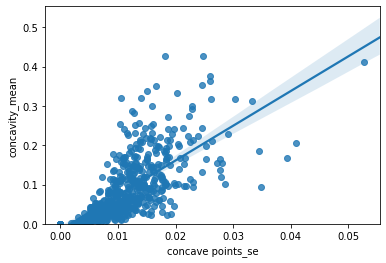

Correlation coefficient between radius_worst and concavity_mean is equal to 0.6882364076436723


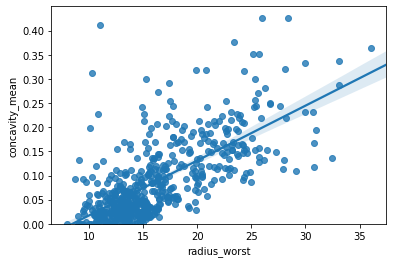

Correlation coefficient between perimeter_worst and concavity_mean is equal to 0.7295649165132022


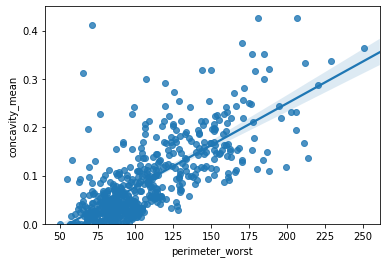

Correlation coefficient between area_worst and concavity_mean is equal to 0.6759872313060878


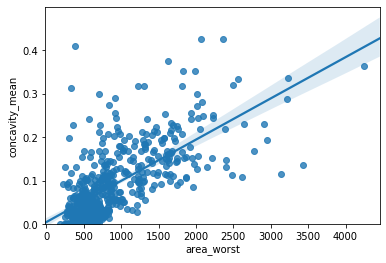

Correlation coefficient between compactness_worst and concavity_mean is equal to 0.7549680159063971


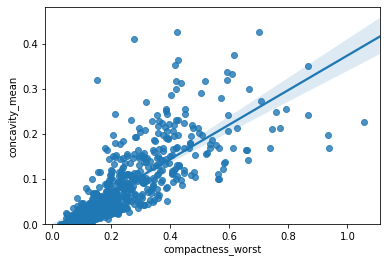

Correlation coefficient between concavity_worst and concavity_mean is equal to 0.8841026390943831


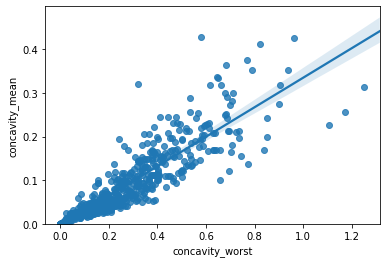

Correlation coefficient between concave points_worst and concavity_mean is equal to 0.8613230336379504


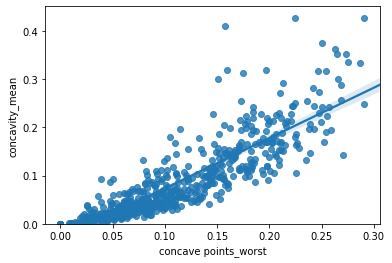

Correlation coefficient between radius_se and concave points_mean is equal to 0.6980498335607405


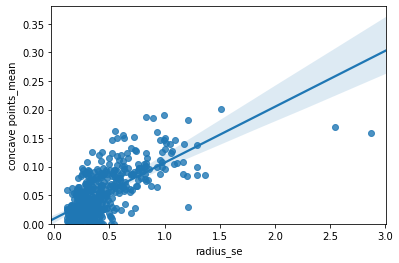

Correlation coefficient between perimeter_se and concave points_mean is equal to 0.710649871613899


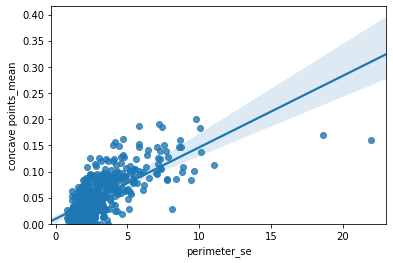

Correlation coefficient between area_se and concave points_mean is equal to 0.6902985397595536


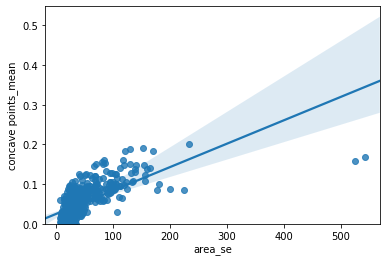

Correlation coefficient between concave points_se and concave points_mean is equal to 0.6156341308969191


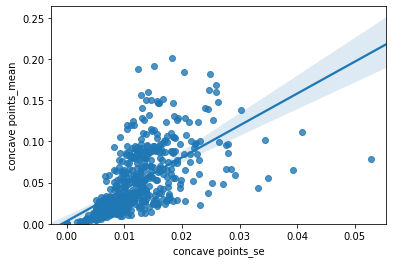

Correlation coefficient between radius_worst and concave points_mean is equal to 0.8303176311186149


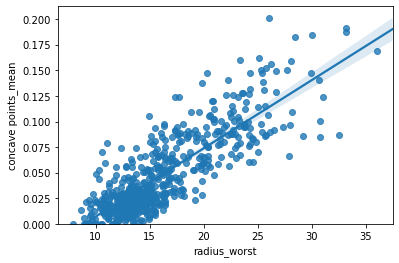

Correlation coefficient between perimeter_worst and concave points_mean is equal to 0.8559231281343112


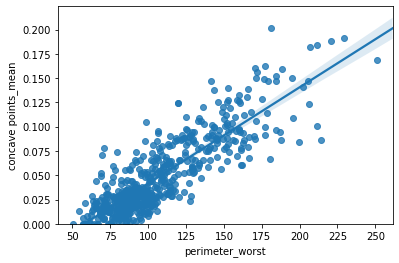

Correlation coefficient between area_worst and concave points_mean is equal to 0.8096296199096177


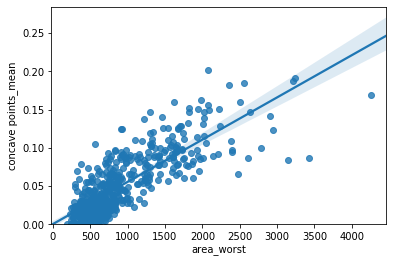

Correlation coefficient between compactness_worst and concave points_mean is equal to 0.6674536768257113


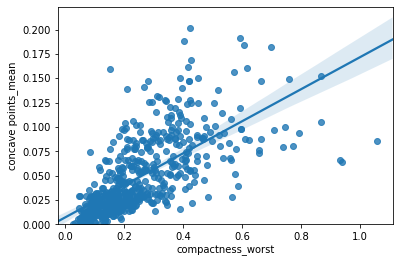

Correlation coefficient between concavity_worst and concave points_mean is equal to 0.7523994975749646


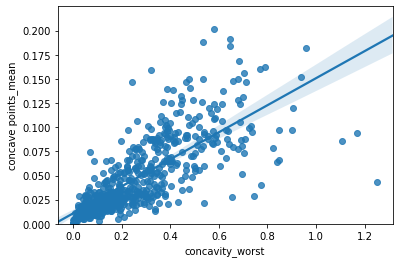

Correlation coefficient between concave points_worst and concave points_mean is equal to 0.9101553142985934


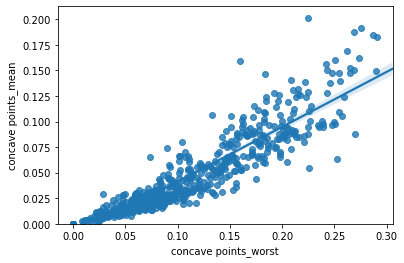

Correlation coefficient between symmetry_worst and symmetry_mean is equal to 0.6998257976437318


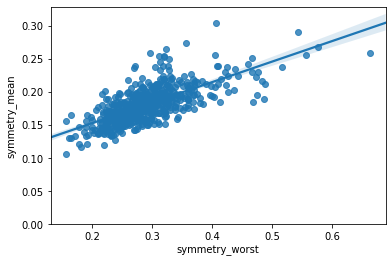

Correlation coefficient between fractal_dimension_se and fractal_dimension_mean is equal to 0.6881315774585518


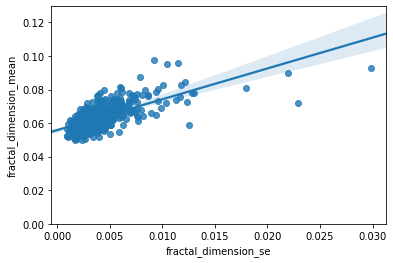

Correlation coefficient between fractal_dimension_worst and fractal_dimension_mean is equal to 0.7672967792384351


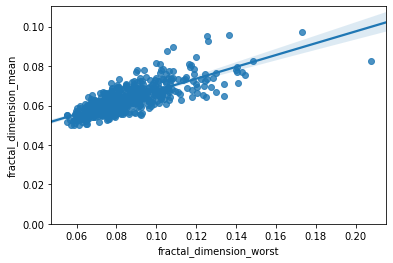

Correlation coefficient between perimeter_se and radius_se is equal to 0.9727936770160752


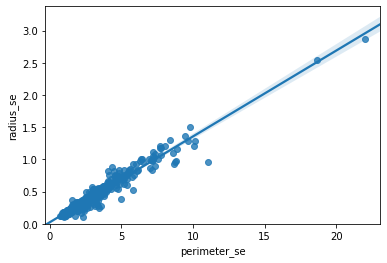

Correlation coefficient between area_se and radius_se is equal to 0.95183011211099


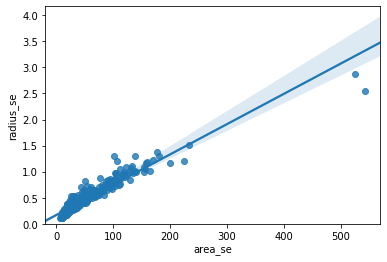

Correlation coefficient between radius_worst and radius_se is equal to 0.7150651951351847


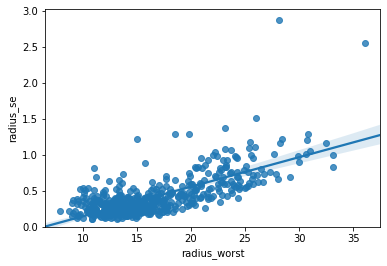

Correlation coefficient between perimeter_worst and radius_se is equal to 0.7196838036650056


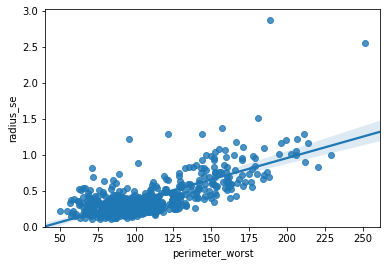

Correlation coefficient between area_worst and radius_se is equal to 0.7515484761266196


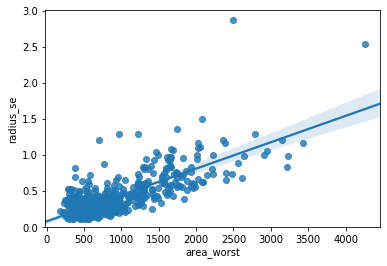

Correlation coefficient between area_se and perimeter_se is equal to 0.9376554069544158


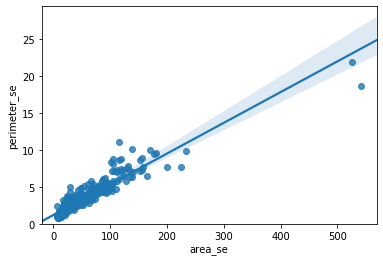

Correlation coefficient between radius_worst and perimeter_se is equal to 0.6972005927206462


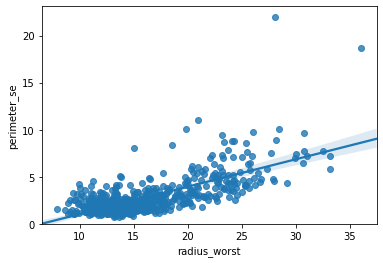

Correlation coefficient between perimeter_worst and perimeter_se is equal to 0.7210313099890179


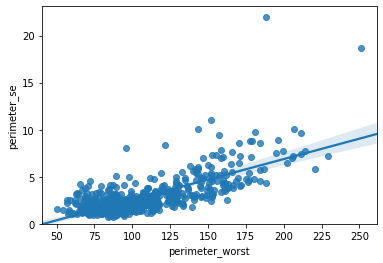

Correlation coefficient between area_worst and perimeter_se is equal to 0.7307129731302835


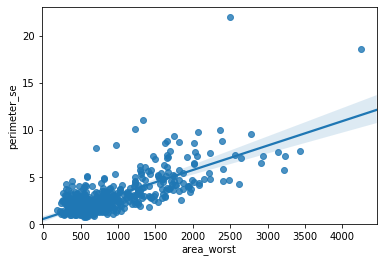

Correlation coefficient between radius_worst and area_se is equal to 0.7573731889240161


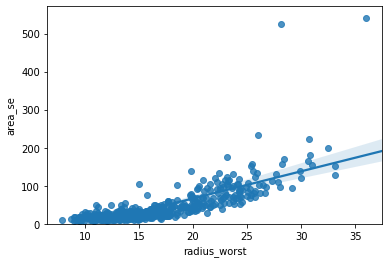

Correlation coefficient between perimeter_worst and area_se is equal to 0.761212636068759


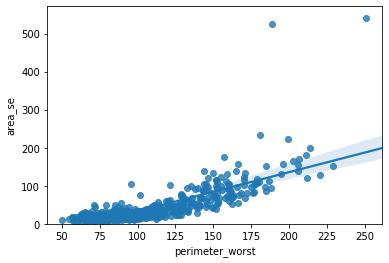

Correlation coefficient between area_worst and area_se is equal to 0.8114079609317285


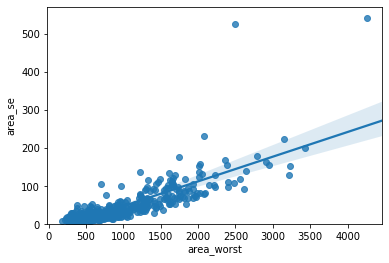

Correlation coefficient between concavity_se and compactness_se is equal to 0.8012683427383301


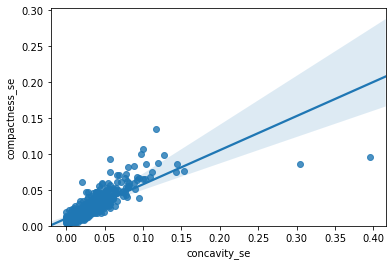

Correlation coefficient between concave points_se and compactness_se is equal to 0.7440826676953249


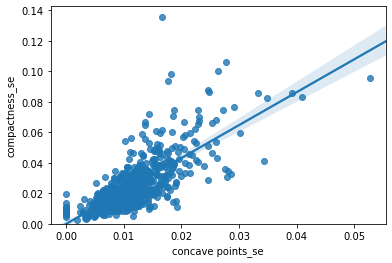

Correlation coefficient between fractal_dimension_se and compactness_se is equal to 0.8032688176617685


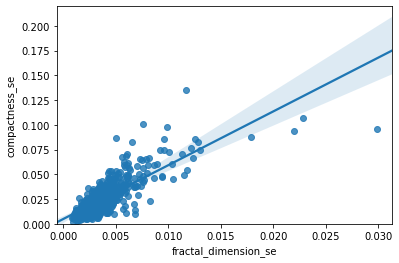

Correlation coefficient between compactness_worst and compactness_se is equal to 0.6787803543724954


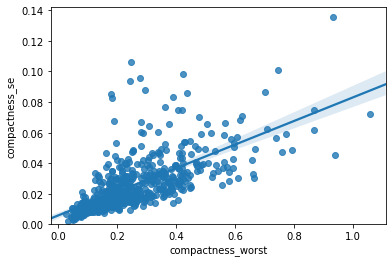

Correlation coefficient between concavity_worst and compactness_se is equal to 0.6391466977559199


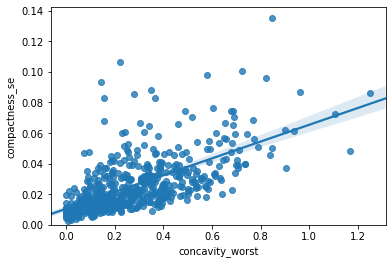

Correlation coefficient between concave points_se and concavity_se is equal to 0.771803994923847


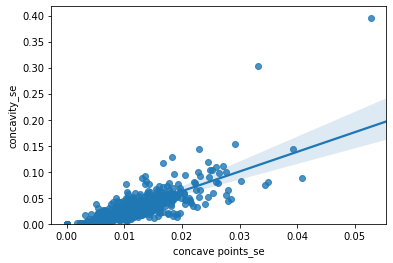

Correlation coefficient between fractal_dimension_se and concavity_se is equal to 0.7273721838811942


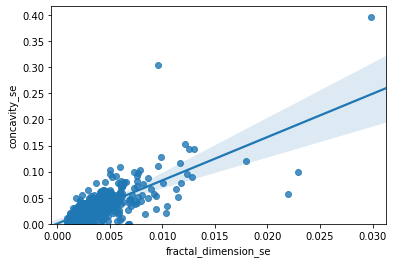

Correlation coefficient between concavity_worst and concavity_se is equal to 0.6625641337427421


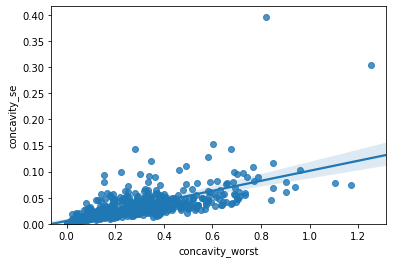

Correlation coefficient between fractal_dimension_se and concave points_se is equal to 0.6110441393807232


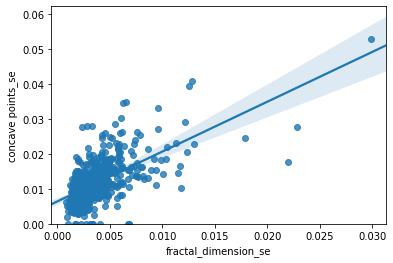

Correlation coefficient between concave points_worst and concave points_se is equal to 0.6024496059209876


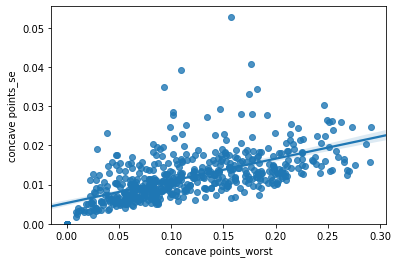

Correlation coefficient between perimeter_worst and radius_worst is equal to 0.993707916102951


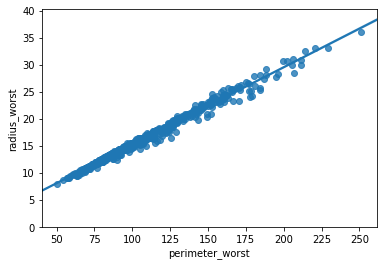

Correlation coefficient between area_worst and radius_worst is equal to 0.9840145644590724


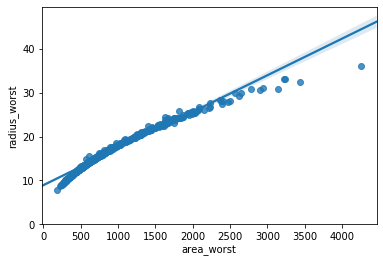

Correlation coefficient between concave points_worst and radius_worst is equal to 0.7874238517122413


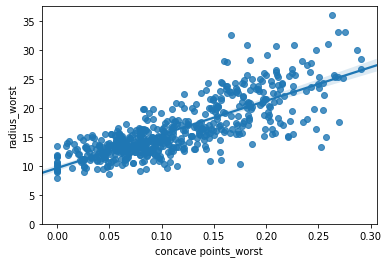

Correlation coefficient between area_worst and perimeter_worst is equal to 0.9775780914063881


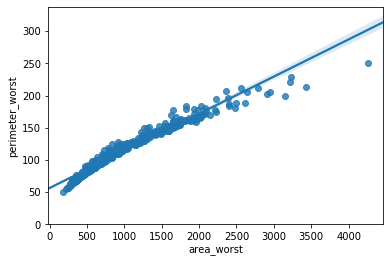

Correlation coefficient between concavity_worst and perimeter_worst is equal to 0.6183440795335159


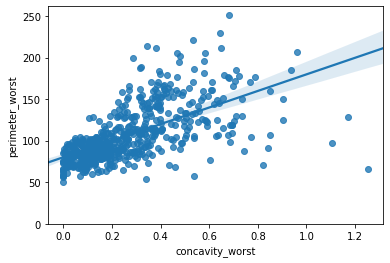

Correlation coefficient between concave points_worst and perimeter_worst is equal to 0.8163221016875445


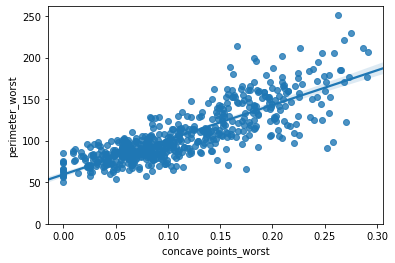

Correlation coefficient between concave points_worst and area_worst is equal to 0.7474188023228173


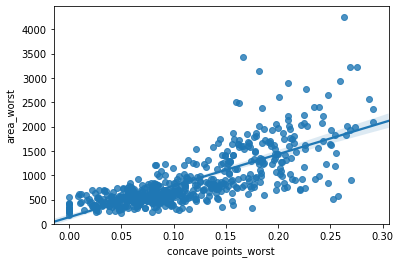

Correlation coefficient between fractal_dimension_worst and smoothness_worst is equal to 0.6176241916554381


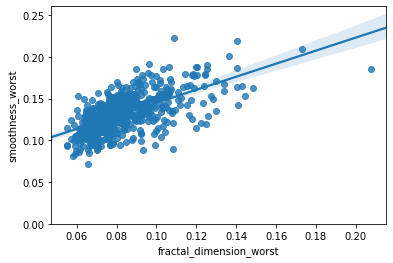

Correlation coefficient between concavity_worst and compactness_worst is equal to 0.8922608987764692


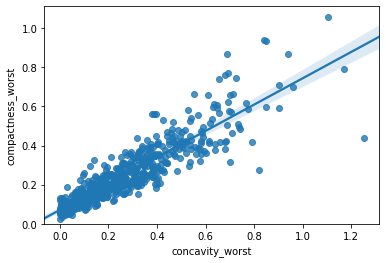

Correlation coefficient between concave points_worst and compactness_worst is equal to 0.801080364635253


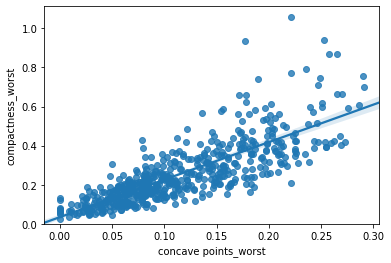

Correlation coefficient between symmetry_worst and compactness_worst is equal to 0.6144405011493058


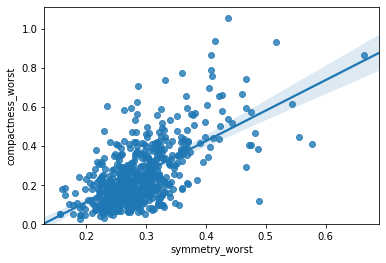

Correlation coefficient between fractal_dimension_worst and compactness_worst is equal to 0.8104548563116136


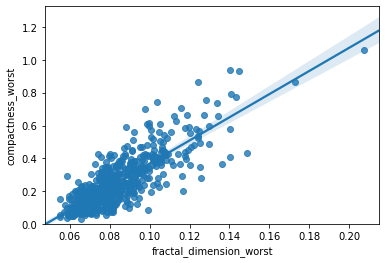

Correlation coefficient between concave points_worst and concavity_worst is equal to 0.8554338603439984


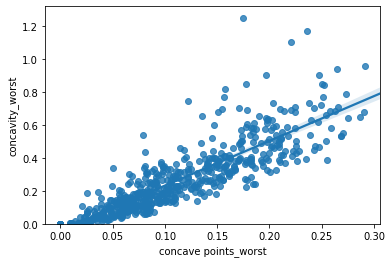

Correlation coefficient between fractal_dimension_worst and concavity_worst is equal to 0.6865109212448627


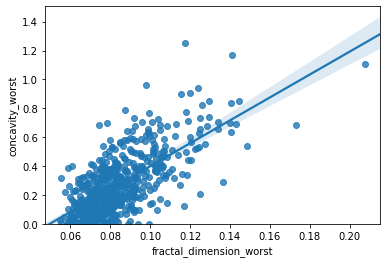

In [51]:
for pair in most_correlated:
    print('Correlation coefficient between', pair[0], 'and', pair[1], 'is equal to', corr_matrix.at[pair[0], pair[1]])
    sns.regplot(x=pair[0], y=pair[1], data=data)
    plt.ylim(0,);
    plt.show()

For bigger correlation values data points will better correspond to the regression line.<br><br>
Correlation between *perimeter_mean* and *radius_mean* converge to 1 as well as correlation between *area_mean* and *radius_mean* and *area_mean* and *perimeter_mean*. It's because tumors' shape looks like circle, and there is a dependence between perimeter, radius and area of the circle.<br><br>
Also the following pairs of features have very strong correlation (correlation coefficient > 0.9):
- *area_worst* and *perimeter_worst*
- *area_worst* and *radius_worst*
- *perimeter_worst* and *radius_worst*
- *concave points_worst* and *concave points_mean*
- *area_se* and *radius_se*
- *perimeter_se* and *radius_se*
- *concave points_mean* and *concavity_mean*
- *area_worst* and *area_mean*
- *perimeter_worst* and *area_mean*
- *radius_worst* and *area_mean*
- *area_worst* and *perimeter_mean* 
- *perimeter_worst* and *perimeter_mean*
- *radius_worst* and *perimeter_mean*
- *texture_worst* and *texture_mean*
- *area_worst* and *radius_mean*
- *perimeter_worst* and *radius_mean*
- *radius_worst* and *radius_mean*

<a id="Conclusion"></a>

## 6. Conclusion of Complete EDA

1. *id* feature is useless for making diagnosis, that's why I excluded it.
2. Due to [Histograms](#Histograms) I would **choose** *radius_mean*, *area_mean*, *perimeter_mean*, *concave points_mean*, *area_se*, *radius_worst*, *perimeter_worst*, *area_worst*, *concave points_worst* features to distinguish between malignant and benign cases.
3. Due to [Histograms](#Histograms) I would **exclude** *texture_mean*, *smoothness_mean*, *symmetry_mean*, *fractal_dimension_mean*, *radius_se*, *texture_se*, *perimeter_se*, *smoothnes_se*, *compactness_se*, *concavity_se*, *concave points_se*, *symmetry_se*, *fractal_dimension_se*, *texture_worst*, *smoothness_worst*, *symmetry_worst*, *fractal_dimension_worst*. The histograms of the features have significantly big intersections for malignant and benign cases.
4. As we see from [Boxplots](#Boxplots) benign tumors are smaller in size in general.
5. Correlation coefficients between *perimeter_mean* and *radius_mean*,  *area_mean* and *radius_mean*, *area_mean* and *perimeter_mean*  converge to 1. Also there are 17 pairs of features with highly strong correlation (correlation coefficient > 0.9).